# Preparing Wide Form Time Data

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [4]:
# import wide-form data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtZ3XGbdzViSOsO6Gam4LQAQTSrFMXSAz_CIcBmmQYBv9uuggbGcxUuqXtMeUPiHR9NyI6At3apf5d/pub?output=csv"
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22,7/1/22,7/2/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181987,182033,182072,182149,182228,182324,182403,182528,182594,182643
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,278211,278504,278793,279077,279077,279167,280298,280851,281470,282141
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,266015,266025,266030,266038,266049,266062,266073,266087,266105,266115
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43774,43774,43774,43774,43774,43774,43774,43774,44177,44177
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,101320,101320,101320,101320,101320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,658503,658503,658503,658503,659853,659853,659853,659853,659853,659853
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11824,11824,11824,11824,11824,11824,11824,11824,11824,11824
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,324922,325110,325110,325110,325348,325498,325498,325857,325857,325857


## pd.melt

In [5]:
# view columns
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/23/22', '6/24/22', '6/25/22', '6/26/22', '6/27/22', '6/28/22',
       '6/29/22', '6/30/22', '7/1/22', '7/2/22'],
      dtype='object', length=897)

In [6]:
# keep Province/State, Country/Region, Lat, and Long with id_vars list
melted = pd.melt(df,id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'] )
melted

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
254500,NaN,West Bank and Gaza,31.952200,35.233200,7/2/22,659853
254501,NaN,Winter Olympics 2022,39.904200,116.407400,7/2/22,535
254502,NaN,Yemen,15.552727,48.516388,7/2/22,11824
254503,NaN,Zambia,-13.133897,27.849332,7/2/22,325857


In [7]:
# drop Lat and Long and name variable column "Date" and value column "Confirmed"
melted = pd.melt(df.drop(columns=['Lat','Long']),
                 id_vars=['Province/State', 'Country/Region'],
                value_name="keyword operator from-rainbow">='Confirmed',var_name="Date")
melted

,Province/State,Country/Region,Date,True
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0
...,...,...,...,...
254500,NaN,West Bank and Gaza,7/2/22,659853
254501,NaN,Winter Olympics 2022,7/2/22,535
254502,NaN,Yemen,7/2/22,11824
254503,NaN,Zambia,7/2/22,325857


In [8]:
# convert Date column to datetime object
melted['Date'] = pd.to_datetime(melted['Date'])

# confirm change
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254505 entries, 0 to 254504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  79477 non-null   object        
 1   Country/Region  254505 non-null  object        
 2   Date            254505 non-null  datetime64[ns]
 3   True            254505 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.8+ MB


In [9]:
# set Date as index; do NOT resample yet (this will lump all values together by date
# and lose the data separated by country
melted = melted.set_index("Date")
melted

,Province/State,Country/Region,True
Date,,,
2020-01-22,NaN,Afghanistan,0
2020-01-22,NaN,Albania,0
2020-01-22,NaN,Algeria,0
2020-01-22,NaN,Andorra,0
2020-01-22,NaN,Angola,0
...,...,...,...
2022-07-02,NaN,West Bank and Gaza,659853
2022-07-02,NaN,Winter Olympics 2022,535
2022-07-02,NaN,Yemen,11824


## Combining .groupby and .resample for groupwise- time series processing

In [10]:
## view number of countries
melted['Country/Region'].nunique()

199

In [11]:
# use groupby and resample together to avoid losing country data
df_ts = melted.groupby('Country/Region').resample("D").sum()
df_ts

C:\Users\eliud\AppData\Local\Temp\ipykernel_9144\778787073.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('Country/Region').resample("D").sum()


True
Country/Region Date              
Afghanistan    2020-01-22       0
               2020-01-23       0
               2020-01-24       0
               2020-01-25       0
               2020-01-26       0
...                           ...
Zimbabwe       2022-06-28  255383
               2022-06-29  255520
               2022-06-30  255586
               2022-07-01  255586
               2022-07-02  255586

[177707 rows x 1 columns]

In [12]:
# we now have a multiIndex
df_ts.head().index

MultiIndex([('Afghanistan', '2020-01-22'),
            ('Afghanistan', '2020-01-23'),
            ('Afghanistan', '2020-01-24'),
            ('Afghanistan', '2020-01-25'),
            ('Afghanistan', '2020-01-26')],
           names=['Country/Region', 'Date'])

## Filtering by Date with a MultiIndex using pd.IndexSlice

In [13]:
# use pd.IndexSlice with .loc to filter for all values in 2020
df_ts.loc[pd.IndexSlice[:, '2020'],:]

True
Country/Region Date             
Afghanistan    2020-01-22      0
               2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
...                          ...
Zimbabwe       2020-12-27  13077
               2020-12-28  13148
               2020-12-29  13325
               2020-12-30  13625
               2020-12-31  13867

[68655 rows x 1 columns]

In [14]:
# filter by both date and country
df_ts.loc[pd.IndexSlice['Afghanistan':'Algeria','2020'],:]

True
Country/Region Date             
Afghanistan    2020-01-22      0
               2020-01-23      0
               2020-01-24      0
               2020-01-25      0
               2020-01-26      0
...                          ...
Algeria        2020-12-27  98249
               2020-12-28  98631
               2020-12-29  98988
               2020-12-30  99311
               2020-12-31  99610

[1035 rows x 1 columns]

## Plotting with a MultiIndex

In [15]:
# create df to plot the number of Confirmed Cases for several countries in North America 
countries = ['Canada','Mexico','US']
plot_df = df_ts.loc[countries].copy()
plot_df

True
Country/Region Date                
Canada         2020-01-22         0
               2020-01-23         2
               2020-01-24         3
               2020-01-25         3
               2020-01-26         3
...                             ...
US             2022-06-28  87296327
               2022-06-29  87490815
               2022-06-30  87627486
               2022-07-01  87821971
               2022-07-02  87838623

[2679 rows x 1 columns]

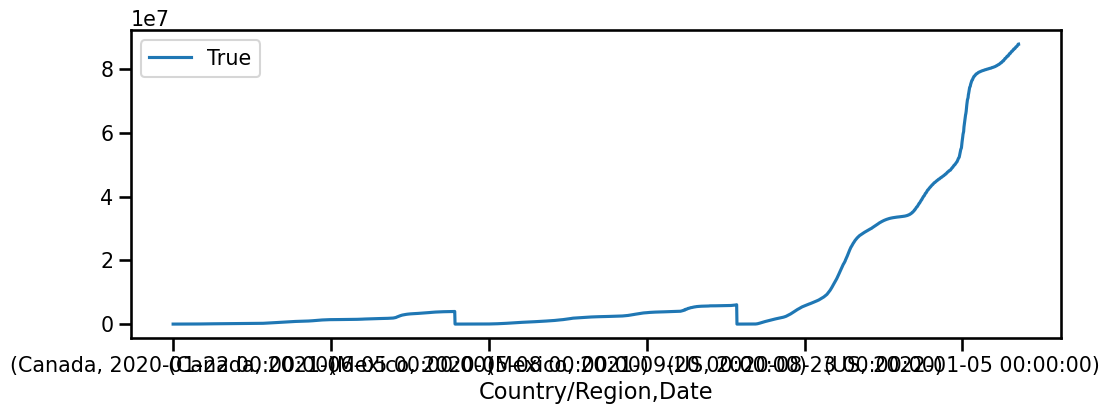

In [16]:
# pandas gets confused when we try to plot using a multiIndex
# it lumps all data into 1 line instead of multiple lines
plot_df.plot(figsize=(12,4));

## Using unstack() for Plotting with a MultiIndex

In [17]:
# unstack allows us to keep Date as index (level 1) and convert Country/Region index (level 0) into columns
unstacked = plot_df.unstack(level=0)
unstacked

True                   
Country/Region   Canada   Mexico        US
Date                                      
2020-01-22            0        0         1
2020-01-23            2        0         1
2020-01-24            3        0         2
2020-01-25            3        0         2
2020-01-26            3        0         5
...                 ...      ...       ...
2022-06-28      3945493  5986917  87296327
2022-06-29      3948112  5986917  87490815
2022-06-30      3954275  6034602  87627486
2022-07-01      3955704  6058689  87821971
2022-07-02      3956897  6058689  87838623

[893 rows x 3 columns]

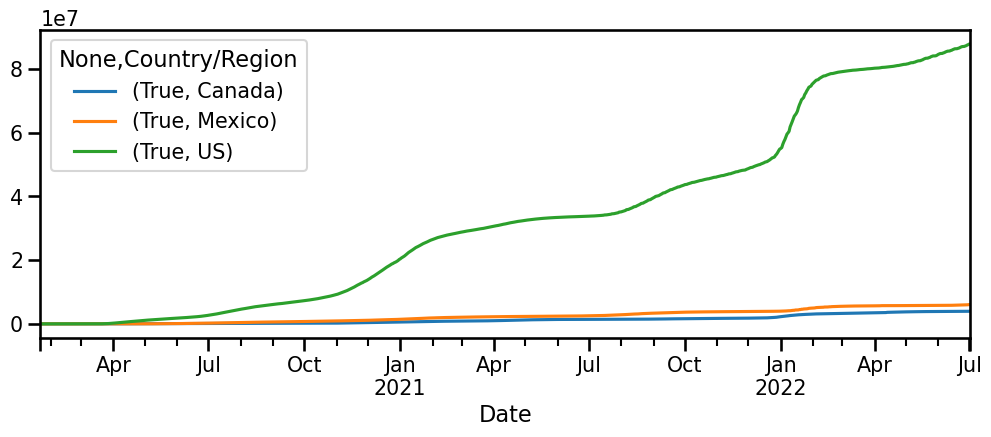

In [18]:
# plot after unstack makes separate column for each country
ax = unstacked.plot()

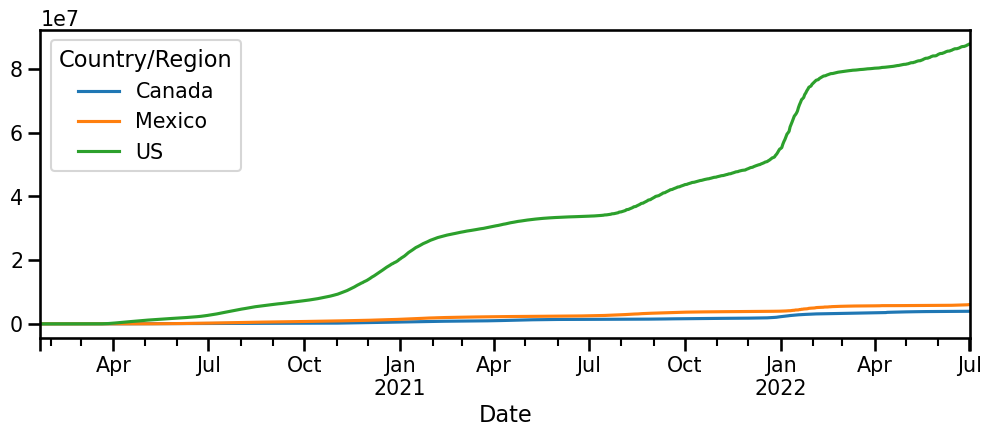

In [19]:
# slice out True column from multiIndex to remove it from legend
unstacked.columns
ax = unstacked[True].plot()

## Select 1 Country to Analyze

In [20]:
# separate US from other countries, but keep all dates
ts_us = df_ts.loc['US', True]
ts_us.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='Date', length=893, freq='D')

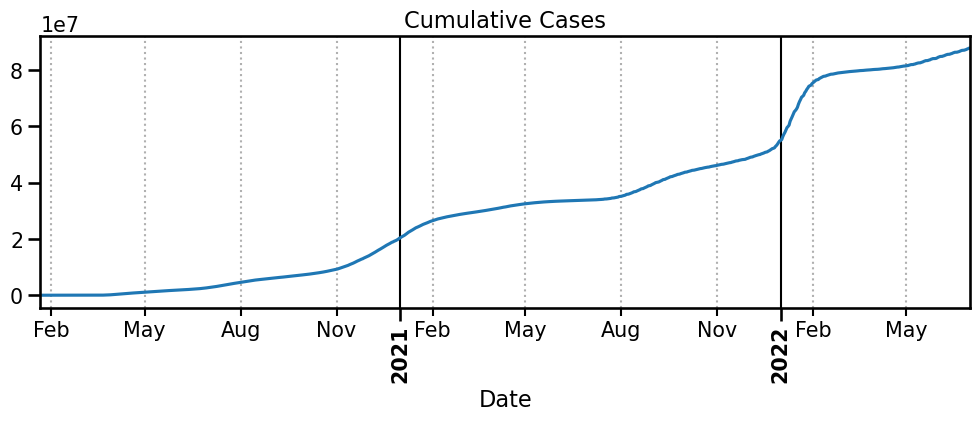

In [21]:
# plot US data only
ax = ts_us.plot(style='-',title="Cumulative Cases");
format_xdates(ax);

In [22]:
# slice out US values into new df
df_us = melted[melted['Country/Region']=='US']

## check for states (spoiler: not found)
df_us

,Province/State,Country/Region,True
Date,,,
2020-01-22,NaN,US,1
2020-01-23,NaN,US,1
2020-01-24,NaN,US,2
2020-01-25,NaN,US,2
2020-01-26,NaN,US,5
...,...,...,...
2022-06-28,NaN,US,87296327
2022-06-29,NaN,US,87490815
2022-06-30,NaN,US,87627486


# Plotting Data with Different Units

In [23]:
# import csv from jnb
df = pd.read_csv("covid_us_county.csv")
display(df.head())
df.info()

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017826 entries, 0 to 3017825
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   fips        float64
 1   county      object 
 2   state       object 
 3   lat         float64
 4   long        float64
 5   date        object 
 6   cases       int64  
 7   state_code  object 
 8   deaths      int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 207.2+ MB


In [24]:
# view all state abbreviations
df['state_code'].unique()

array(['AL', 'AK', nan, 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [25]:
# create df for missing values in state_code
check = df[df['state_code'].isna()]
check

,fips,county,state,lat,long,date,cases,state_code,deaths
92106,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-22,0,NaN,0
92107,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-23,0,NaN,0
92108,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-24,0,NaN,0
92109,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-25,0,NaN,0
92110,60.0,NaN,American Samoa,-14.2710,-170.1320,2020-01-26,0,NaN,0
...,...,...,...,...,...,...,...,...,...
2718025,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-08,21103,NaN,119
2718026,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-09,21103,NaN,119
2718027,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-10,21103,NaN,119
2718028,78.0,NaN,Virgin Islands,18.3358,-64.8963,2022-07-11,21175,NaN,119


In [26]:
# view unique missing values in state_code
check['state'].unique()

array(['American Samoa', 'Diamond Princess', 'District of Columbia',
       'Grand Princess', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands'], dtype=object)

In [27]:
# add state codes for territories and cruises
df.loc[ df['state']== 'American Samoa', 'state_code'] = "AS"
df.loc[ df['state']=='District of Columbia', 'state_code'] = "DC"
df.loc[ df['state']== 'Guam', 'state_code'] = "GU"
df.loc[ df['state']== 'Northern Mariana Islands ', 'state_code'] = "MP"
df.loc[ df['state']=='Puerto Rico', 'state_code'] = "PR"
df.loc[ df['state']=='Virgin Islands', 'state_code'] = "VI"
df.loc[ (df['state']=='Diamond Princess') | (df['state']=='Grand Princess'), 'state_code'] = "CR"

# confirm changes
df['state_code'].unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'CR', 'DC',
       'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
       'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NM', 'NY', 'NC', 'ND', nan, 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [28]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# set date as index
df = df.set_index('date')

# preview changes
df

,fips,county,state,lat,long,cases,state_code,deaths
date,,,,,,,,
2020-01-22,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-23,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-24,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-25,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
2020-01-26,1001.0,Autauga,Alabama,32.539527,-86.644082,0,AL,0
...,...,...,...,...,...,...,...,...
2022-07-08,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-09,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19
2022-07-10,56045.0,Weston,Wyoming,43.839612,-104.567488,1667,WY,19


## Visualizing Time Series with Different Magnitudes

In [29]:
# drop unneeded columns
df = df.drop(columns=['fips','lat','long'])
df

,county,state,cases,state_code,deaths
date,,,,,
2020-01-22,Autauga,Alabama,0,AL,0
2020-01-23,Autauga,Alabama,0,AL,0
2020-01-24,Autauga,Alabama,0,AL,0
2020-01-25,Autauga,Alabama,0,AL,0
2020-01-26,Autauga,Alabama,0,AL,0
...,...,...,...,...,...
2022-07-08,Weston,Wyoming,1667,WY,19
2022-07-09,Weston,Wyoming,1667,WY,19
2022-07-10,Weston,Wyoming,1667,WY,19


In [30]:
## resample as daily freq by state
df_ts = df.groupby("state_code").resample("D").sum()
df_ts

C:\Users\eliud\AppData\Local\Temp\ipykernel_9144\2045514000.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = df.groupby("state_code").resample("D").sum()


cases  deaths
state_code date                      
AK         2020-01-22       0       0
           2020-01-23       0       0
           2020-01-24       0       0
           2020-01-25       0       0
           2020-01-26       0       0
...                       ...     ...
WY         2022-07-08  165619    1834
           2022-07-09  165619    1834
           2022-07-10  165619    1834
           2022-07-11  165619    1834
           2022-07-12  167386    1845

[50568 rows x 2 columns]

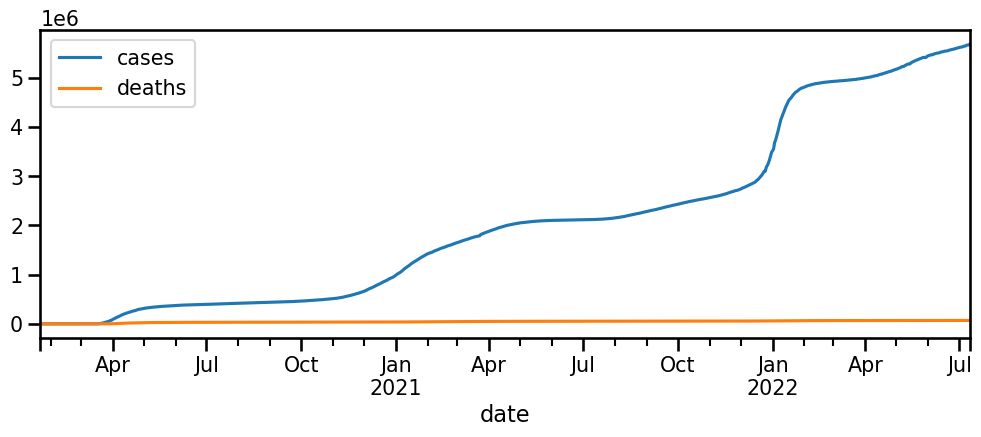

In [31]:
# plot NY
state_ts = df_ts.loc['NY'].copy()
ax = state_ts.plot();

## Using twin axes

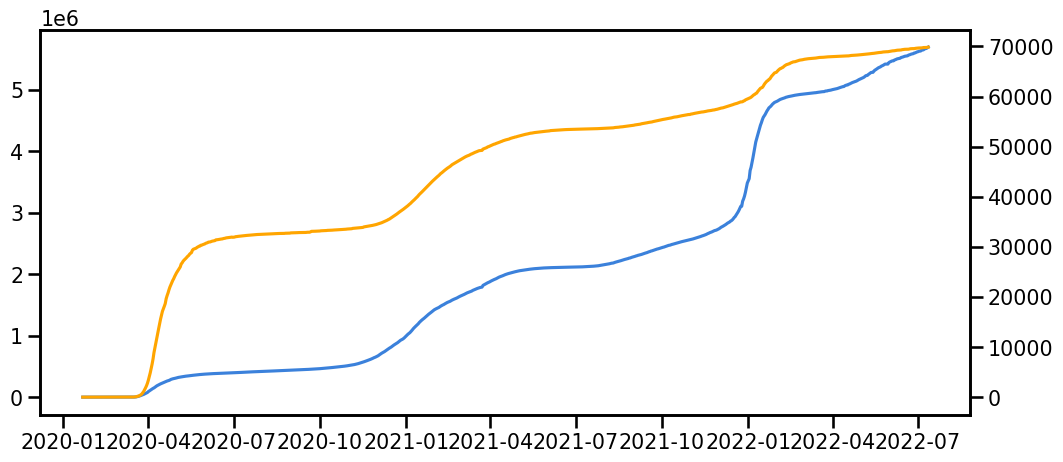

In [32]:
# use twin axes to make death numbers easier to 
fig, ax1 = plt.subplots(figsize=(12,5))
## Plot first line on original ax
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
# Make twin axis and plot second line
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange');

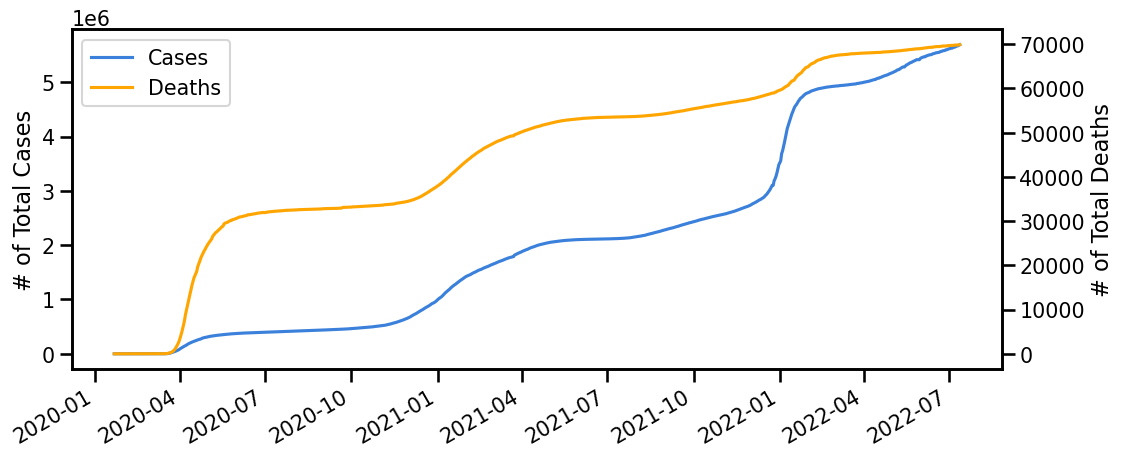

In [33]:
# Solution for having two legends
# Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(state_ts.index, state_ts['cases'] ,color='#3b81db',label='Cases')
ax1.set_ylabel("# of Total Cases")
# Make twin axis
ax2 = ax1.twinx()
ax2.plot(state_ts.index ,state_ts['deaths'],label='Deaths',color='orange')
ax2.set_ylabel("# of Total Deaths")
## Removing the grids
ax1.grid(False)
ax2.grid(False)
## Making joined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0);
fig.autofmt_xdate()

In [34]:
# function for above formatting
def plot_compare_cols(state_ts,col1='cases',color1='#3b81db',
                      col2='deaths',color2='orange',
                     ylabel1="# of Total Cases", ylabel2="# of Total Deaths",
                     figsize=(12,5)):
    """#Solution for having two legends
    # Source: https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a
    """
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.plot(state_ts.index, state_ts[col1] ,color=color1,label=col1.title())
    ax1.set_ylabel(ylabel1)
    # Make twin axis
    ax2 = ax1.twinx()
    ax2.plot(state_ts.index ,state_ts[col2],label=col2.title(),color=color2)
    ax2.set_ylabel(ylabel2)
    ## Removing the grids
    ax1.grid(False)
    ax2.grid(False)
    ## Making joined legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc=0);
    fig.autofmt_xdate()
    return fig, (ax1,ax2)

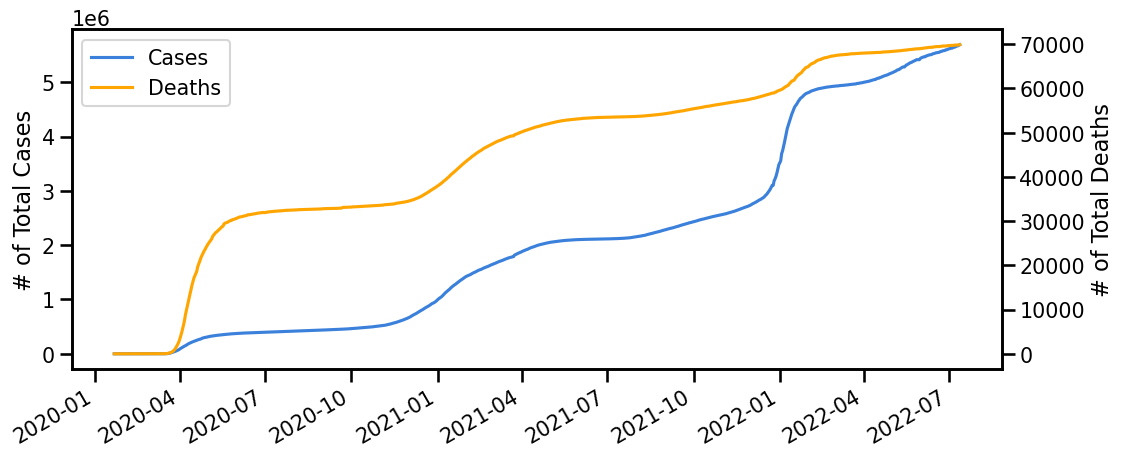

In [35]:
# use function on NY
fig,(ax1,ax2) = plot_compare_cols(state_ts)

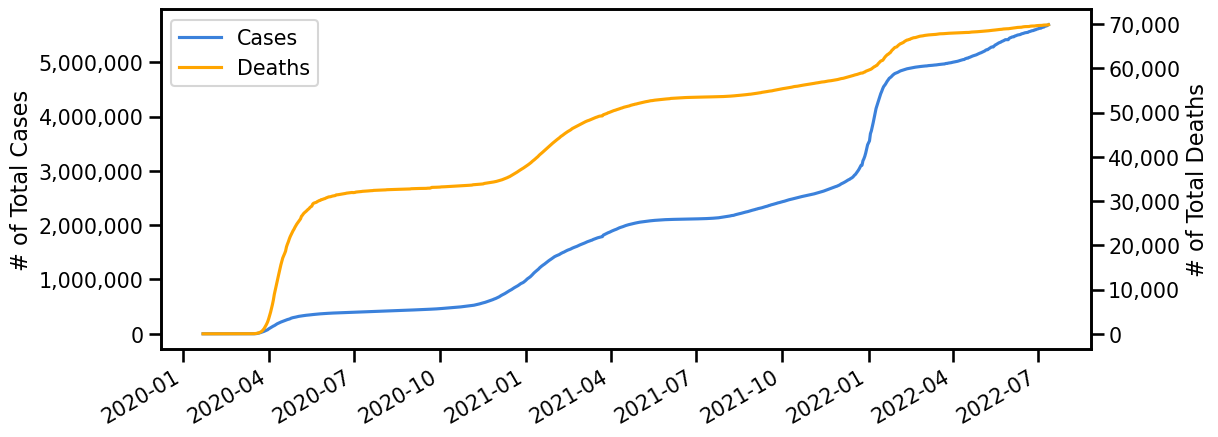

In [36]:
# import mticks for formatting of scientific notation and ticks
import matplotlib.ticker as mticks

# add commas to cases and deaths
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.yaxis.set_major_formatter(str_fmt)
ax2.yaxis.set_major_formatter(str_fmt)

In [37]:
# use funcFormatter to clean up zeros
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats in thousands"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

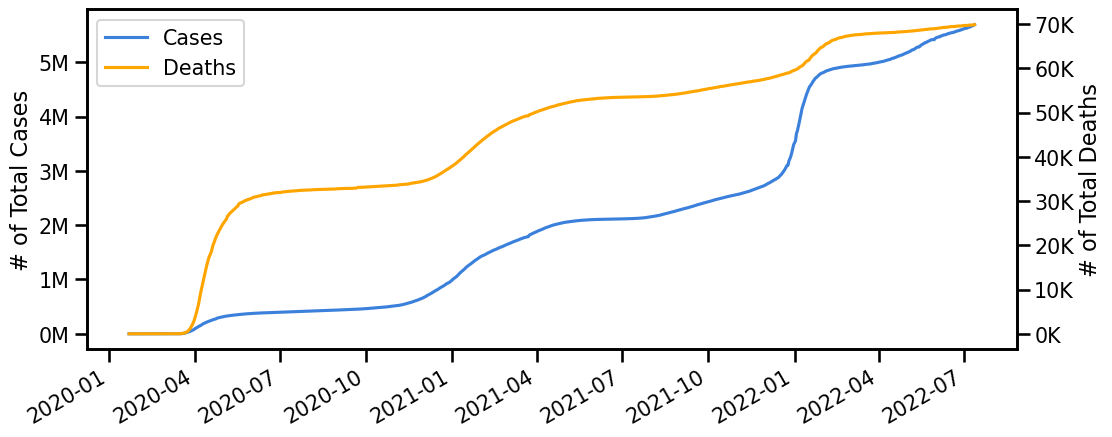

In [38]:
fig,(ax1,ax2) = plot_compare_cols(state_ts)
## Set the axis' major formatter
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)

## Combining Our Tick Formatting with Date Formatting

In [39]:
# create the locator to place ticks every 1 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

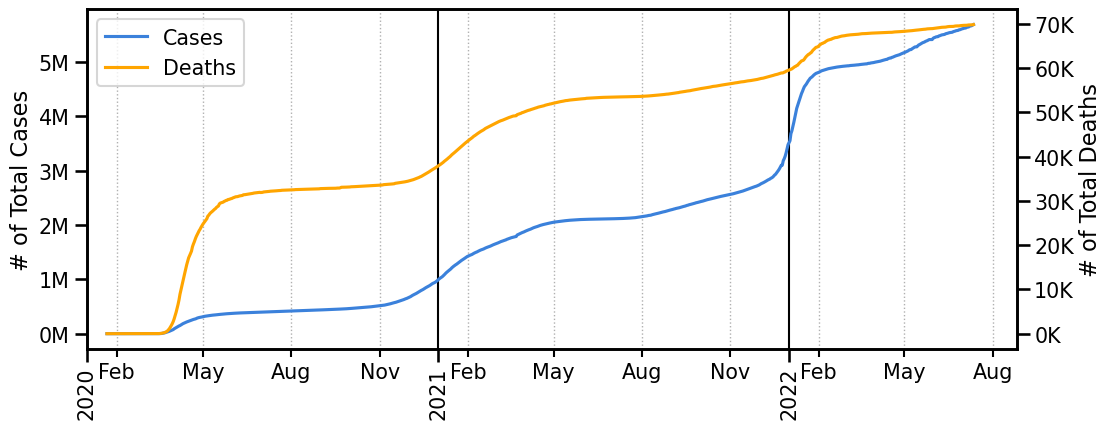

In [40]:
final_fig,(ax1,ax2) = plot_compare_cols(state_ts)
ax1.set_xlim(left=pd.to_datetime('01/2020'))
## Set the y-axes major formatters
ax1.yaxis.set_major_formatter(fmt_mill)
ax2.yaxis.set_major_formatter(fmt_thous)
## customize minor ticks
ax1.xaxis.set_minor_locator(loc_3months)
ax1.xaxis.set_minor_formatter(fmt_months)
# ## customize major ticks
ax1.xaxis.set_major_locator(loc_year)
ax1.xaxis.set_major_formatter(fmt_year)
## Making major/minor gridlines visually different
ax1.grid(which='minor',axis='x',ls=":",lw=1)
ax1.grid(which='major',axis='x',color='k')
final_fig.autofmt_xdate(which='major',rotation=90,ha='center')

# Time Series Stats

In [41]:
# view df_ts
df_ts

cases  deaths
state_code date                      
AK         2020-01-22       0       0
           2020-01-23       0       0
           2020-01-24       0       0
           2020-01-25       0       0
           2020-01-26       0       0
...                       ...     ...
WY         2022-07-08  165619    1834
           2022-07-09  165619    1834
           2022-07-10  165619    1834
           2022-07-11  165619    1834
           2022-07-12  167386    1845

[50568 rows x 2 columns]

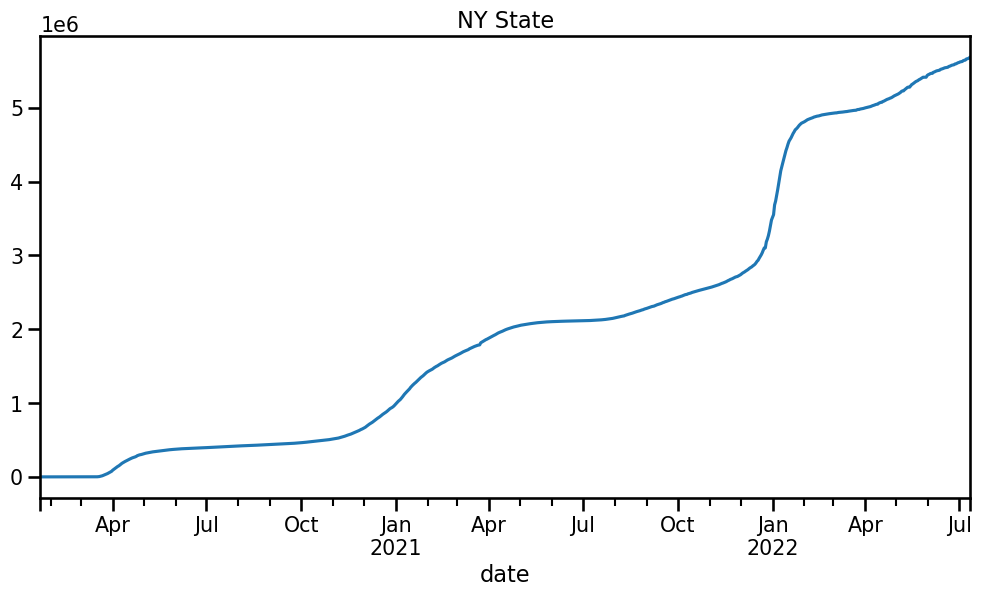

In [42]:
# quick visualization
state_code = "NY"
state_ts = df_ts.loc[state_code].copy()
axes = state_ts['cases'].plot(figsize=(12,6),title=f"{state_code} State")

In [43]:
# use diff() to view new cases instead of cumulative
ts_diff = state_ts.diff()
ts_diff

,cases,deaths
date,,
2020-01-22,NaN,NaN
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
...,...,...
2022-07-08,15343.0,14.0
2022-07-09,4025.0,0.0
2022-07-10,3260.0,0.0


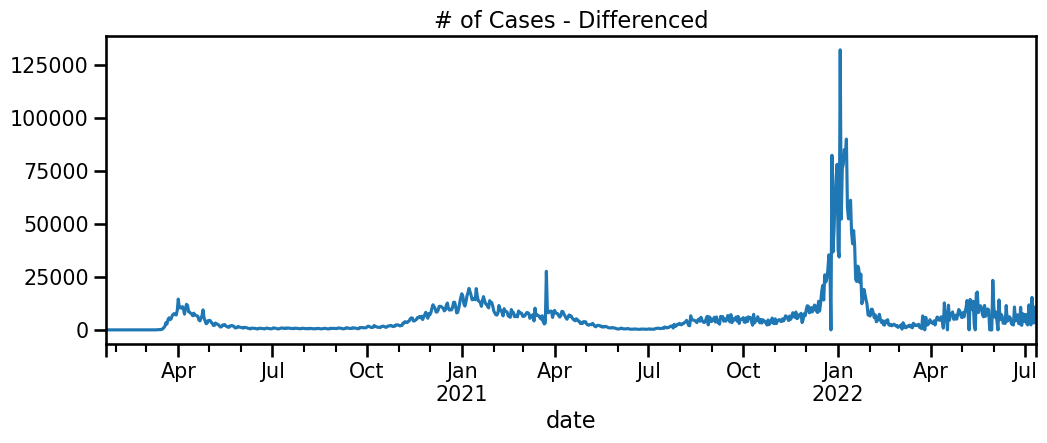

In [44]:
# plot diff
ax = ts_diff['cases'].plot(title='# of Cases - Differenced')

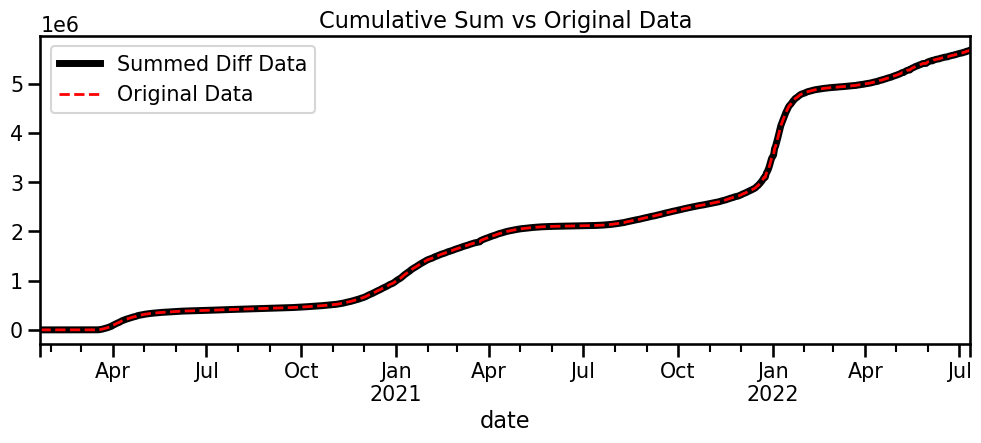

In [45]:
# cumsum() is the opposite of diff()
ts_sum = ts_diff.cumsum()
ax = ts_sum['cases'].plot(title='Cumulative Sum vs Original Data',
                          label='Summed Diff Data',color='black',lw=5)
state_ts['cases'].plot(ax=ax,label='Original Data',color='red',lw=2,ls='--')
ax.legend();

## Rolling Statistics

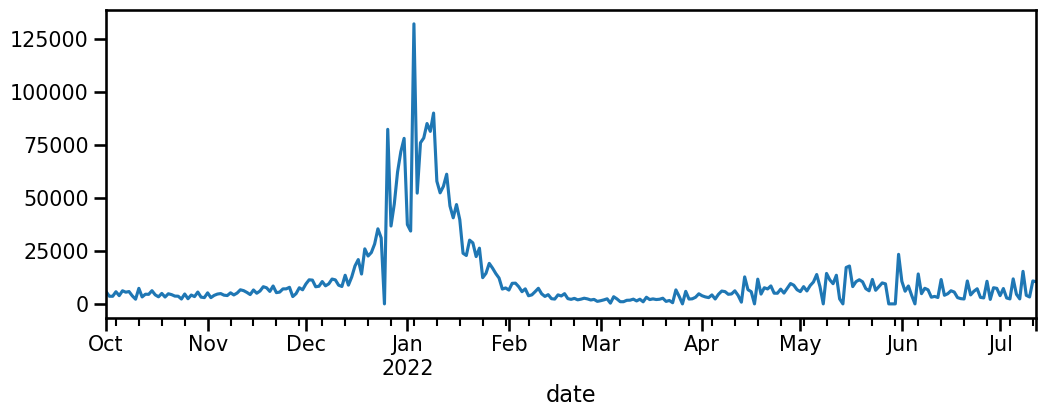

In [46]:
## selecting a single feature and smaller time period for demonstration
ts = ts_diff.loc['10/2021':'7/2022','cases'].copy().dropna()
ts.plot();

In [47]:
# calculate 7-day moving average for ts using .rolling()
window = 7
ts_mean = ts.rolling(window).mean()

# first 7 values will be NaN due to the window size for the mean being 7
ts_mean

date
2021-10-01            NaN
2021-10-02            NaN
2021-10-03            NaN
2021-10-04            NaN
2021-10-05            NaN
                 ...     
2022-07-08    6626.285714
2022-07-09    6168.142857
2022-07-10    6234.428571
2022-07-11    7443.857143
2022-07-12    7248.142857
Freq: D, Name: cases, Length: 285, dtype: float64

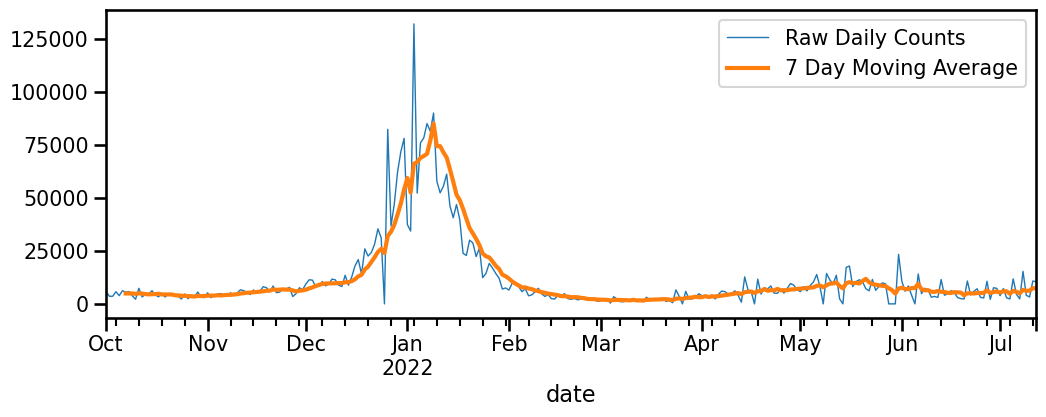

In [48]:
# compare raw plot with average plot
ax = ts.plot(label='Raw Daily Counts',lw=1)
ts_mean.plot(label=f'{window} Day Moving Average',ax=ax,lw=3)
ax.legend();

In [49]:
# calculate rolling std()
std = ts.rolling(window).std()
std

date
2021-10-01            NaN
2021-10-02            NaN
2021-10-03            NaN
2021-10-04            NaN
2021-10-05            NaN
                 ...     
2022-07-08    5143.954015
2022-07-09    5223.219168
2022-07-10    5176.023276
2022-07-11    5103.509166
2022-07-12    4932.231997
Freq: D, Name: cases, Length: 285, dtype: float64

In [50]:
## calculating +/- std
ts_stats= pd.DataFrame({'mean':ts_mean,
             'mean+std':ts_mean+std,
             'mean-std':ts_mean-std})
ts_stats = ts_stats.dropna()
ts_stats

,mean,mean+std,mean-std
date,,,
2021-10-07,4897.571429,6043.555265,3751.587593
2021-10-08,4905.142857,6057.936916,3752.348798
2021-10-09,4928.857143,6051.743666,3805.970620
2021-10-10,4731.142857,6198.013270,3264.272444
2021-10-11,4958.714286,6703.903455,3213.525116
...,...,...,...
2022-07-08,6626.285714,11770.239729,1482.331700
2022-07-09,6168.142857,11391.362025,944.923689
2022-07-10,6234.428571,11410.451847,1058.405296


<Axes: xlabel='date'>

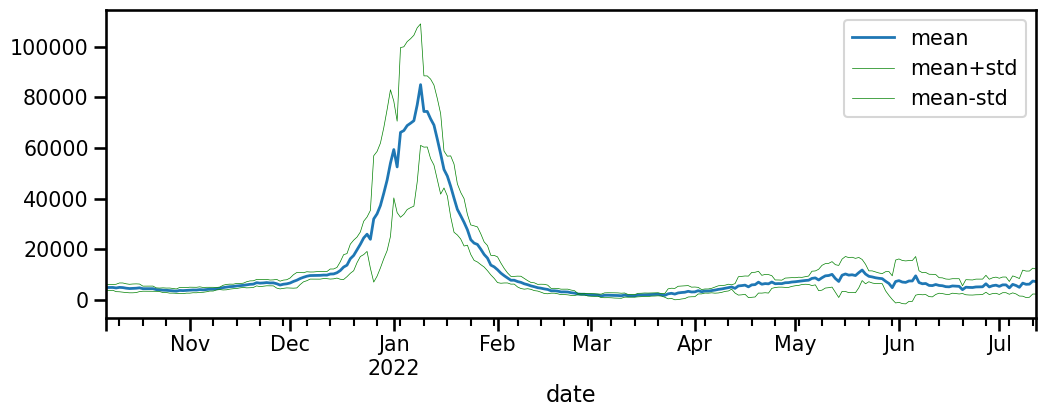

In [51]:
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ts_stats.plot(y='mean+std',color='g',lw=0.5,ax=ax)
ts_stats.plot(y='mean-std',color='g',lw=0.5,ax=ax)

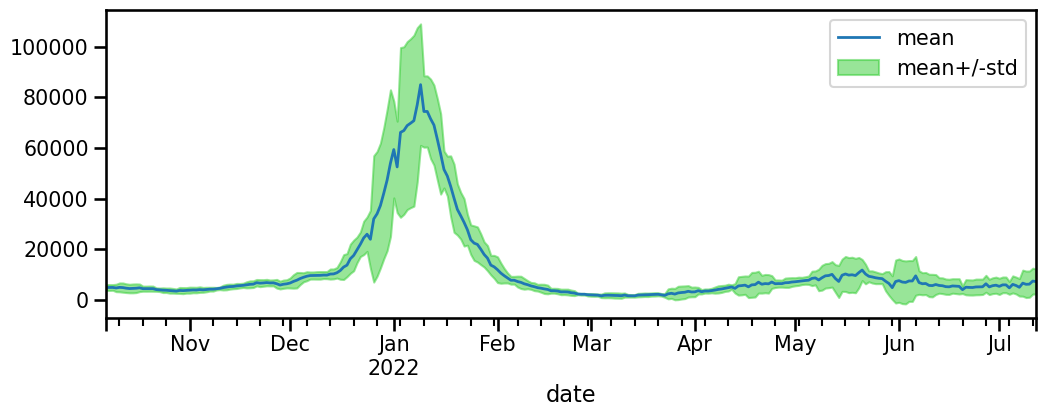

In [52]:
# use ax.fill_between to fill in the area between the two sets of y-values
## plot the rolling mean +/- the rolling std
ax = ts_stats.plot(y='mean',lw=2)
ax.fill_between(ts_stats.index, ts_stats['mean+std'], ts_stats['mean-std'], color='limegreen', alpha=0.5,zorder=0,label="mean+/-std");
ax.legend();

# Normalizing Time Series

In [53]:
# define cases for two differet states
ny_cases = df_ts.loc["NY",'cases']
ky_cases = df_ts.loc['KY','cases']

In [54]:
# create df with each states cases as a column
compare_ts = pd.DataFrame({'KY':ky_cases,
                          "NY":ny_cases})
# view new df
compare_ts

,KY,NY
date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2022-07-08,1414766,5661360
2022-07-09,1414766,5665385
2022-07-10,1414766,5668645


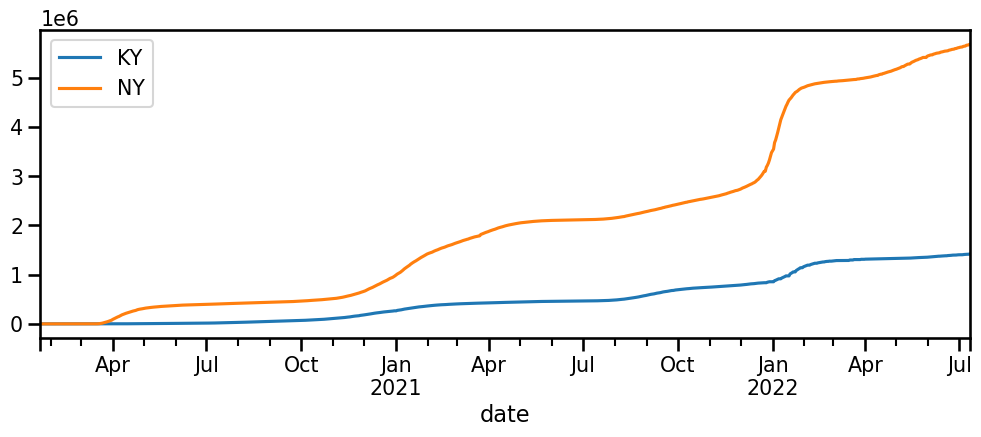

In [55]:
# plot new df
compare_ts.plot();


In [56]:
# create diff() to change viz to non-cumulative values
compare_diff = compare_ts.diff().dropna()
compare_diff

,KY,NY
date,,
2020-01-23,0.0,0.0
2020-01-24,0.0,0.0
2020-01-25,0.0,0.0
2020-01-26,0.0,0.0
2020-01-27,0.0,0.0
...,...,...
2022-07-08,2143.0,15343.0
2022-07-09,0.0,4025.0
2022-07-10,0.0,3260.0


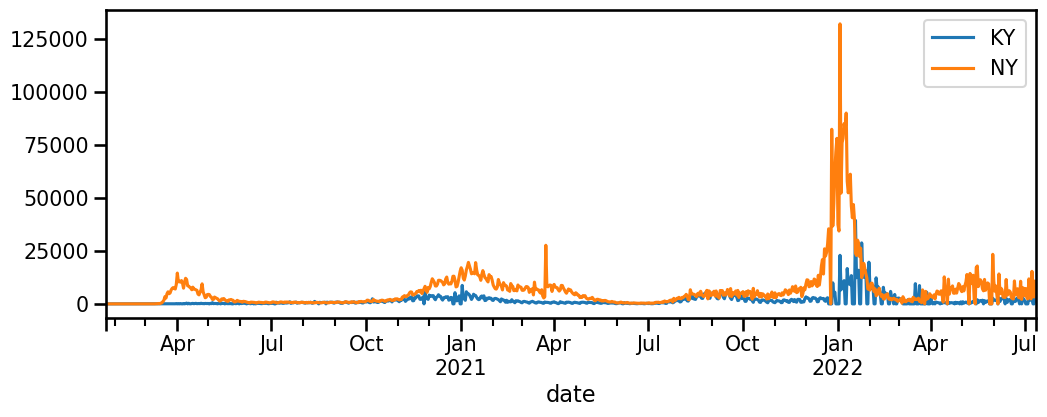

In [57]:
# plot diff
compare_diff.plot();

In [58]:
# use pct_change() to normalize raw diff daily changes into percentage daily changes
compare_pct = compare_ts.pct_change(freq='D')
compare_pct

,KY,NY
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
...,...,...
2022-07-08,0.001517,0.002717
2022-07-09,0.000000,0.000711
2022-07-10,0.000000,0.000575


In [59]:
# multiply by 100 to get actual percentage value
compare_pct = compare_ts.pct_change(freq='D')*100
compare_pct

,KY,NY
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
...,...,...
2022-07-08,0.151704,0.271749
2022-07-09,0.000000,0.071096
2022-07-10,0.000000,0.057542


In [60]:
# cut out dates before 07-2021
plot_ts = compare_pct.loc['07/2021':]
plot_ts

,KY,NY
date,,
2021-07-01,0.035041,0.018487
2021-07-02,0.034384,0.023778
2021-07-03,0.039958,0.013517
2021-07-04,0.016320,0.016539
2021-07-05,0.015888,0.017576
...,...,...
2022-07-08,0.151704,0.271749
2022-07-09,0.000000,0.071096
2022-07-10,0.000000,0.057542


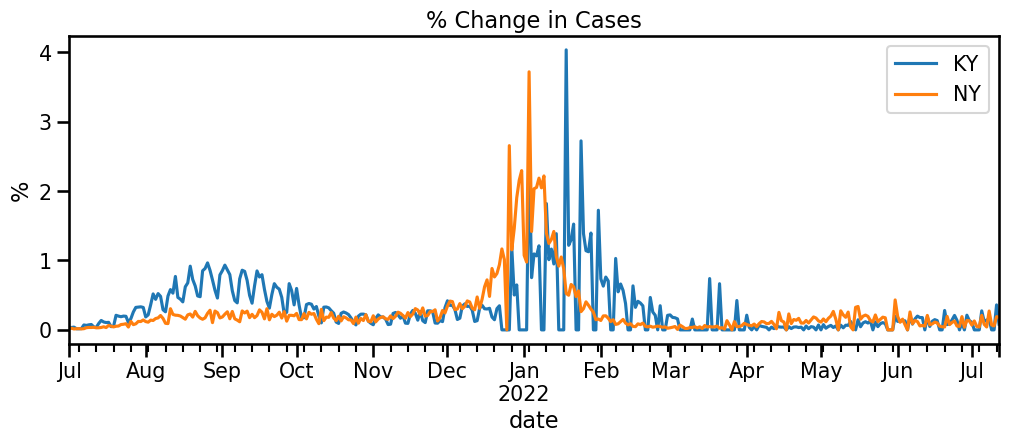

In [61]:
# plot
ax = plot_ts.plot(title='% Change in Cases',ylabel='%')

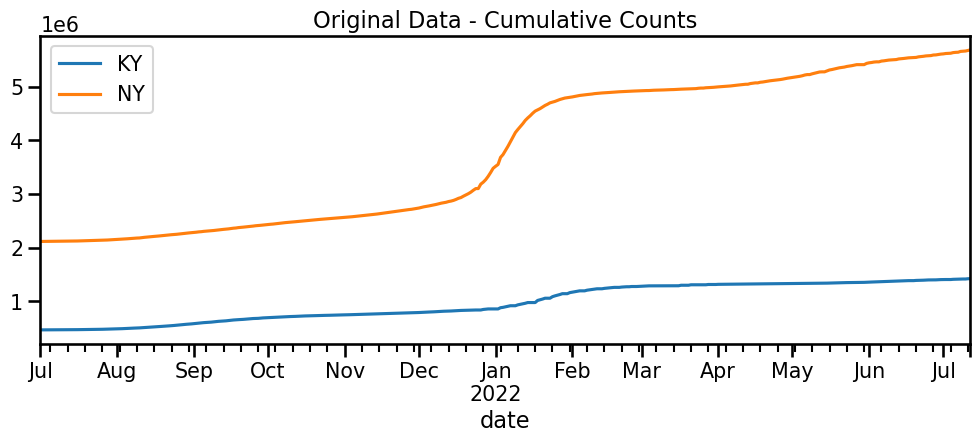

In [62]:
# plot raw daily changes
compare_ts.loc['07/2021':].plot(title='Original Data - Cumulative Counts');

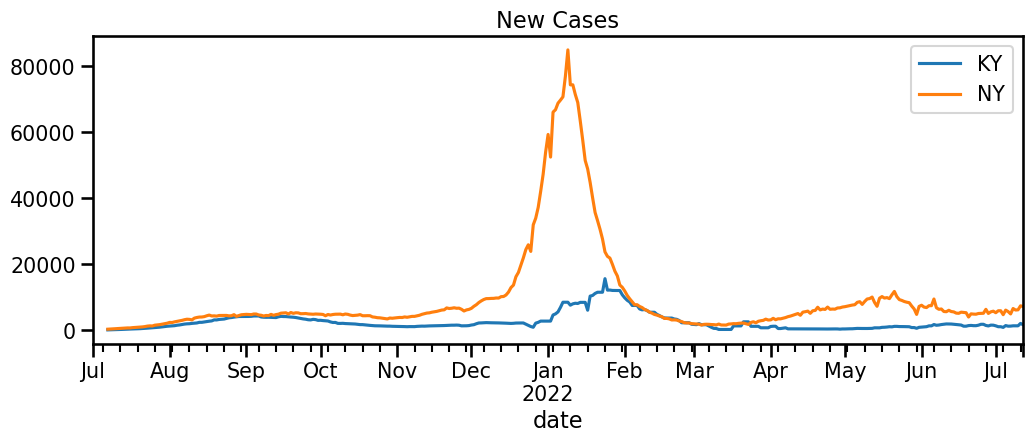

In [63]:
# plot rolling mean instead of daily changes
compare_diff.loc['07/2021':].rolling(7).mean().plot(title='New Cases');

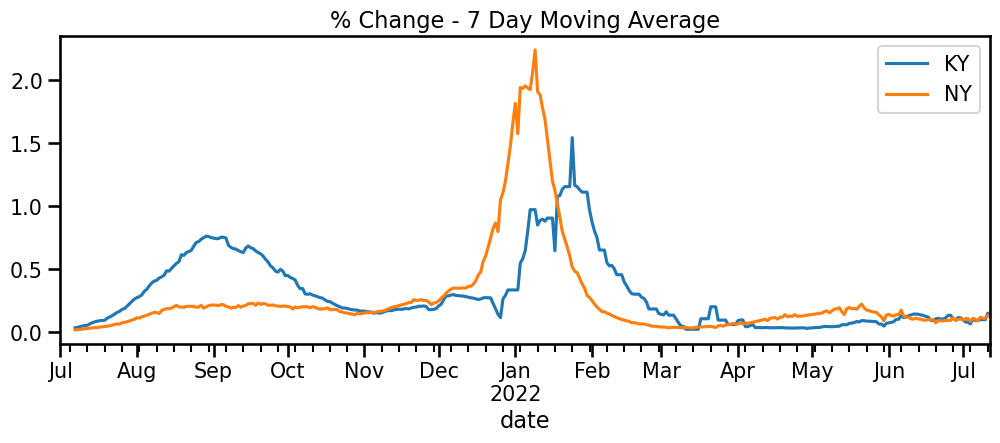

In [64]:
# normalize to percentage
plot_ts = compare_pct.loc['07/2021':].rolling(window).mean()
plot_ts.plot(title='% Change - 7 Day Moving Average');

## Normalize by Population

In [65]:
# import data
us_pop = pd.read_csv("2019_Census_US_Population_Data_By_State_Lat_Long.csv")
us_pop.head()

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629


In [66]:
# match state with abbreviation from previous data set
state_lookup = df[['state','state_code']]
state_lookup = state_lookup.drop_duplicates(subset=['state']).reset_index(drop=True)
state_lookup.head()

,state,state_code
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [67]:
## merging the us pop with our state lookup
merged_pop = pd.merge(us_pop[['STATE','POPESTIMATE2019']], state_lookup, left_on='STATE', right_on='state')
# merged_pop = merged_pop.drop(columns='state').set_index('state_code')
state_pop = merged_pop.set_index('state_code')['POPESTIMATE2019']
state_pop.head()

state_code
AL     4903185
AK      731545
AZ     7278717
AR     3017804
CA    39512223
Name: POPESTIMATE2019, dtype: int64

In [68]:
## example calc for KY
compare_ts['KY']/state_pop.loc['KY']*100_000

date
2020-01-22        0.000000
2020-01-23        0.000000
2020-01-24        0.000000
2020-01-25        0.000000
2020-01-26        0.000000
                  ...     
2022-07-08    31666.731204
2022-07-09    31666.731204
2022-07-10    31666.731204
2022-07-11    31780.795058
2022-07-12    31807.095103
Freq: D, Name: KY, Length: 903, dtype: float64

In [69]:
## preparing all columns using for loop to calculate the population
compare_pop = compare_ts.copy()
for col in compare_ts.columns:
    compare_pop[col] =( compare_pop[col] / state_pop.loc[col])*100_000
compare_pop

,KY,NY
date,,
2020-01-22,0.000000,0.000000
2020-01-23,0.000000,0.000000
2020-01-24,0.000000,0.000000
2020-01-25,0.000000,0.000000
2020-01-26,0.000000,0.000000
...,...,...
2022-07-08,31666.731204,29101.921237
2022-07-09,31666.731204,29122.611536
2022-07-10,31666.731204,29139.369394


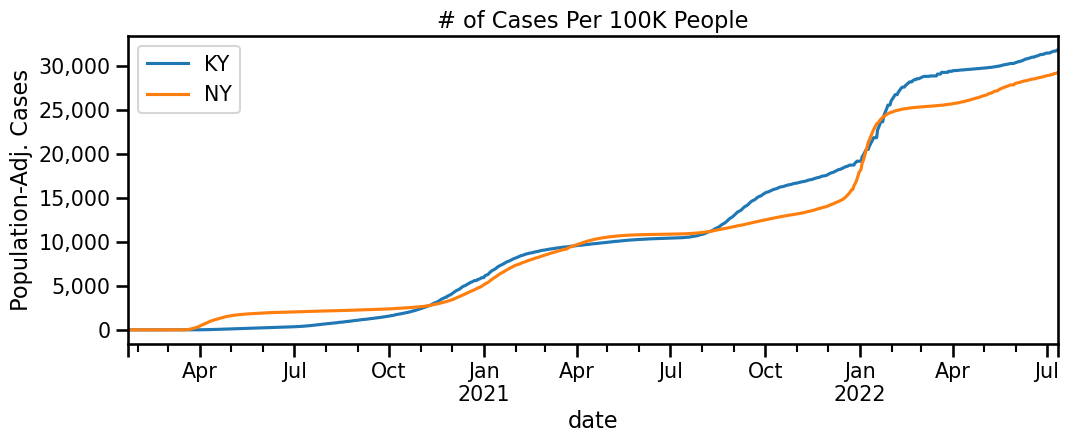

In [70]:
# plot data
ax = compare_pop.plot(ylabel='Population-Adj. Cases',title='# of Cases Per 100K People');
ax.yaxis.set_major_formatter(str_fmt)

# (Core) Preparing Time Series from Wide-Form Data

## Part 1

### Load in the Zillow Home Value Index dataframe.

In [71]:
# import data
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv")
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


### Filter the 4 largest cities into a new dataframe.

Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
Therefore the 4 largest cities would have rank values of [0,1,2,3]

In [72]:
# create new df with filtered data
df_four = df.head(4)

# preview new df
df_four

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### Melt the data to long-form and prepare it for time series analysis.

In [73]:
# melt data to long-form
melted = pd.melt(df_four.drop(columns=['RegionID','SizeRank','RegionType','StateName','State','Metro','CountyName']), id_vars=['RegionName'], value_name='Value',var_name="Date")

# preview melted df
melted

,RegionName,Date,Value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


### Convert the melted dates into datetime datatype.

In [74]:
# convert Date column to datetime
melted['Date'] = pd.to_datetime(melted['Date'])

In [75]:
# verify change
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   Date        1092 non-null   datetime64[ns]
 2   Value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.7+ KB


### Make the datetime column the index.

In [76]:
# set Date as index
melted = melted.set_index("Date")

# verify change
melted

,RegionName,Value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


### Resample the dataframe as monthly frequency, grouped by City.

In [77]:
# use groupby by city and resample by month
df_four_ts = melted.groupby('RegionName').resample("M").sum()

# verify changes
df_four_ts

C:\Users\eliud\AppData\Local\Temp\ipykernel_9144\976740907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_four_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\eliud\AppData\Local\Temp\ipykernel_9144\976740907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_four_ts = melted.groupby('RegionName').resample("M").sum()
C:\Users\eliud\AppData\Local\Temp\ipykernel_9144\976740907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sho

Value
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

## Part 2

### Plot the home values for all 4 cities. (Hint: use unstack)
Make sure to add a title and axis labels.

In [78]:
unstacked_df = df_four_ts.unstack(level=0)
unstacked_df

Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

### Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
Hint: use the FuncFormatter from matplotlib.

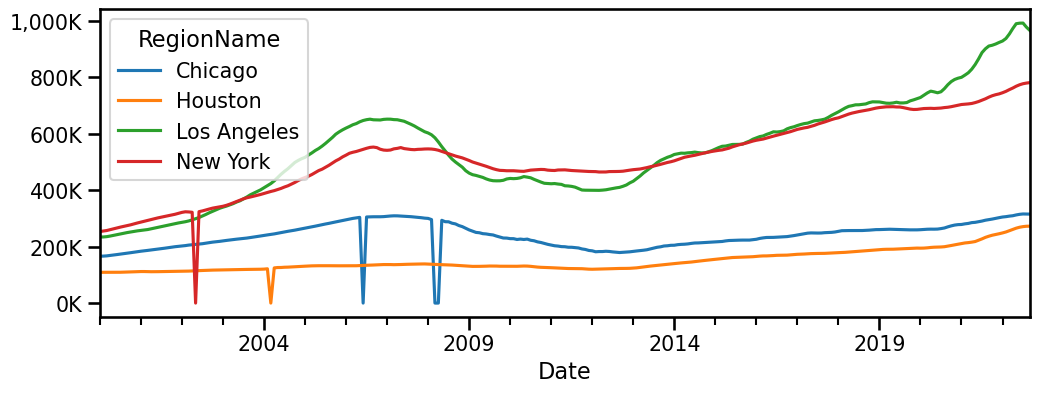

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks

str_fmt = mticks.StrMethodFormatter("{x:,.0f}")

# thousands function for use with FuncFormatter
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

# create formatter
fmt_thous = mticks.FuncFormatter(thousands)

ax = unstacked_df['Value'].plot()

ax.yaxis.set_major_formatter(fmt_thous)

### Answer the following 2 questions using pandas:

#### 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

Most: New York

Least: Houston

In [81]:
df_four_ts = df_four_ts.loc[pd.IndexSlice[:, '2008'],:]
df_four_ts

Value
RegionName  Date                
Chicago     2008-01-31  300207.0
            2008-02-29  296063.0
            2008-03-31       0.0
            2008-04-30       0.0
            2008-05-31  293467.0
            2008-06-30  288495.0
            2008-07-31  288174.0
            2008-08-31  283199.0
            2008-09-30  280695.0
            2008-10-31  274849.0
            2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-01-31  138208.0
            2008-02-29  137512.0
            2008-03-31  136795.0
            2008-04-30  136628.0
            2008-05-31  136228.0
            2008-06-30  135773.0
            2008-07-31  135392.0
            2008-08-31  134770.0
            2008-09-30  133932.0
            2008-10-31  133189.0
            2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-01-31  603029.0
            2008-02-29  596635.0
            2008-03-31  586065.0
            2008-04-30  571226.0
            2008-05-31  554589.0
            2008-06-30  539622.0
            2008-07-31  524220.0
            2008-08-31  510520.0
            2008-09-30  500124.0
            2008-10-31  490979.0
            2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-01-31  546538.0
            2008-02-29  546098.0
            2008-03-31  544562.0
            2008-04-30  541865.0
            2008-05-31  537685.0
            2008-06-30  533810.0
            2008-07-31  529211.0
            2008-08-31  525290.0
            2008-09-30  521347.0
            2008-10-31  518048.0
            2008-11-30  514767.0
            2008-12-31  510309.0

#### 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

Chicago: -5753

Houston: -964

Los Angeles: -12611

New York: -4458

In [82]:
df_four_ts_diff = df_four_ts.loc[pd.IndexSlice[:, '2008-11':'2008-12'],:]
df_four_ts_diff

Value
RegionName  Date                
Chicago     2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-11-30  514767.0
            2008-12-31  510309.0

In [83]:
diff_nov_dec = df_four_ts_diff.diff()

diff_nov_dec

Value
RegionName  Date                
Chicago     2008-11-30       NaN
            2008-12-31   -5753.0
Houston     2008-11-30 -133059.0
            2008-12-31    -964.0
Los Angeles 2008-11-30  350622.0
            2008-12-31  -12611.0
New York    2008-11-30   45473.0
            2008-12-31   -4458.0

## Preparing Non-Uniform Time Data

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

In [4]:
# import data
df = pd.read_csv('Part_1_Crime_Data.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587673 entries, 0 to 587672
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                586689 non-null  float64
 1   Y                586689 non-null  float64
 2   RowID            587673 non-null  int64  
 3   CCNumber         587673 non-null  object 
 4   CrimeDateTime    587673 non-null  object 
 5   CrimeCode        587673 non-null  object 
 6   Description      587673 non-null  object 
 7   Inside_Outside   536412 non-null  object 
 8   Weapon           145090 non-null  object 
 9   Post             579693 non-null  object 
 10  Gender           493050 non-null  object 
 11  Age              473013 non-null  float64
 12  Race             567987 non-null  object 
 13  Ethnicity        61611 non-null   object 
 14  Location         584616 non-null  object 
 15  Old_District     563488 non-null  object 
 16  New_District     16201 non-null   obje

In [5]:
# preview data
df.head()

,X,Y,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
0,-76.584281,39.282869,1,12A01562,2011/12/30 09:37:00+00,6E,LARCENY,I,NaN,214,M,42.0,UNKNOWN,NaN,2300 BOSTON ST,SOUTHEAST,NaN,CANTON,39.282869,-76.584281,"(39.282869,-76.584281)",GARAGE ON PRIV. PROP,1
1,-76.570626,39.367758,2,11L12669,2011/12/30 00:36:00+00,3JF,ROBBERY,I,FIREARM,423,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NaN,6600 MOONFLOWER CT,NORTHEAST,NaN,HAMILTON HILLS,39.367758,-76.570626,"(39.367758,-76.570626)",ROW/TOWNHOUSE-OCC,1
2,-76.562701,39.323386,3,11L13076,2011/12/30 21:00:00+00,3AO,ROBBERY,O,OTHER,432,M,NaN,WHITE,NaN,3400 SHANNON DR,NORTHEAST,NaN,BELAIR-EDISON,39.323386,-76.562701,"(39.323386,-76.562701)",ALLEY,1
3,-76.602909,39.232993,4,12A00628,2011/12/30 09:00:00+00,5A,BURGLARY,I,NaN,913,F,28.0,WHITE,NaN,600 E JEFFREY ST,SOUTHERN,NaN,BROOKLYN,39.232993,-76.602909,"(39.232993,-76.602909)",ROW/TOWNHOUSE-OCC,1
4,-76.576114,39.292284,5,11L13140,2011/12/30 00:13:00+00,4C,AGG. ASSAULT,O,OTHER,222,M,21.0,BLACK_OR_AFRICAN_AMERICAN,NaN,2900 E BALTIMORE ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292284,-76.576114,"(39.292284,-76.576114)",STREET,1


In [10]:
# convert test_date to datetime object
test_date = df.loc[0,'CrimeDateTime']
test_datetime = pd.to_datetime(test_date)
test_datetime

Timestamp('2011-12-30 09:37:00+0000', tz='UTC')

In [11]:
# convert CrimeDateTime column to datetime object (error due to value from year 1202)
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1202-05-22 10:56:02 present at position 526259

In [12]:
# use coerce to replace out of bounds values with null values
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors = 'coerce')

In [13]:
# check how many null values
df['CrimeDateTime'].isna().sum()

3

In [14]:
# drop null values
df = df.dropna(subset=['CrimeDateTime'])

# verify changes
df['CrimeDateTime'].isna().sum()

0

In [15]:
# set datetime as index
df = df.set_index('CrimeDateTime')

# verify change
df.head()

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
2011-12-30 09:37:00+00:00,-76.584281,39.282869,1,12A01562,6E,LARCENY,I,NaN,214,M,42.0,UNKNOWN,NaN,2300 BOSTON ST,SOUTHEAST,NaN,CANTON,39.282869,-76.584281,"(39.282869,-76.584281)",GARAGE ON PRIV. PROP,1
2011-12-30 00:36:00+00:00,-76.570626,39.367758,2,11L12669,3JF,ROBBERY,I,FIREARM,423,M,22.0,BLACK_OR_AFRICAN_AMERICAN,NaN,6600 MOONFLOWER CT,NORTHEAST,NaN,HAMILTON HILLS,39.367758,-76.570626,"(39.367758,-76.570626)",ROW/TOWNHOUSE-OCC,1
2011-12-30 21:00:00+00:00,-76.562701,39.323386,3,11L13076,3AO,ROBBERY,O,OTHER,432,M,NaN,WHITE,NaN,3400 SHANNON DR,NORTHEAST,NaN,BELAIR-EDISON,39.323386,-76.562701,"(39.323386,-76.562701)",ALLEY,1
2011-12-30 09:00:00+00:00,-76.602909,39.232993,4,12A00628,5A,BURGLARY,I,NaN,913,F,28.0,WHITE,NaN,600 E JEFFREY ST,SOUTHERN,NaN,BROOKLYN,39.232993,-76.602909,"(39.232993,-76.602909)",ROW/TOWNHOUSE-OCC,1
2011-12-30 00:13:00+00:00,-76.576114,39.292284,5,11L13140,4C,AGG. ASSAULT,O,OTHER,222,M,21.0,BLACK_OR_AFRICAN_AMERICAN,NaN,2900 E BALTIMORE ST,SOUTHEAST,NaN,PATTERSON PARK NEIGHBORHOOD,39.292284,-76.576114,"(39.292284,-76.576114)",STREET,1


In [16]:
# see earliest timestamp by sorting index
df = df.sort_index()

# verify change
df.index

DatetimeIndex(['1920-06-18 01:30:00+00:00', '1922-06-22 13:00:00+00:00',
               '1963-10-30 00:00:00+00:00', '1966-01-01 01:00:00+00:00',
               '1969-07-20 21:00:00+00:00', '1970-06-15 00:01:00+00:00',
               '1973-07-01 23:00:00+00:00', '1975-06-01 00:00:00+00:00',
               '1976-09-01 01:01:00+00:00', '1977-05-01 00:01:00+00:00',
               ...
               '2023-10-21 20:50:00+00:00', '2023-10-21 21:10:00+00:00',
               '2023-10-21 21:30:00+00:00', '2023-10-21 21:40:00+00:00',
               '2023-10-21 21:49:00+00:00', '2023-10-21 21:49:00+00:00',
               '2023-10-21 22:05:00+00:00', '2023-10-21 22:20:51+00:00',
               '2023-10-21 22:31:00+00:00', '2023-10-21 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=587670, freq=None)

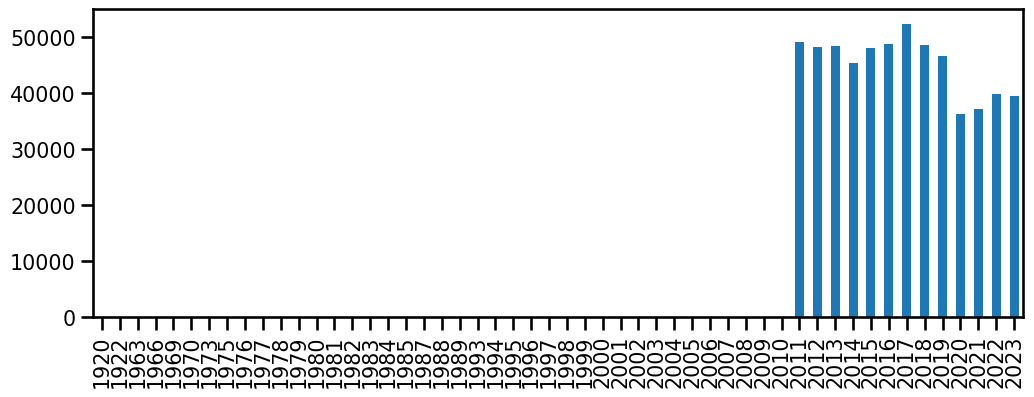

In [20]:
# data viz for crimes per year

# get list of all years
years = df.index.year

# bar plot visualization of crimes per year sorted by year
years.value_counts().sort_index().plot(kind='bar');

In [25]:
# remove pre-2011 data
df = df.loc['2011':]

# verify change
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-01 00:00:00+00:00',
               '2011-01-01 00:00:00+00:00', '2011-01-01 00:01:00+00:00',
               '2011-01-01 00:01:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:05:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:10:00+00:00', '2011-01-01 00:15:00+00:00',
               ...
               '2023-10-21 20:50:00+00:00', '2023-10-21 21:10:00+00:00',
               '2023-10-21 21:30:00+00:00', '2023-10-21 21:40:00+00:00',
               '2023-10-21 21:49:00+00:00', '2023-10-21 21:49:00+00:00',
               '2023-10-21 22:05:00+00:00', '2023-10-21 22:20:51+00:00',
               '2023-10-21 22:31:00+00:00', '2023-10-21 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=587505, freq=None)

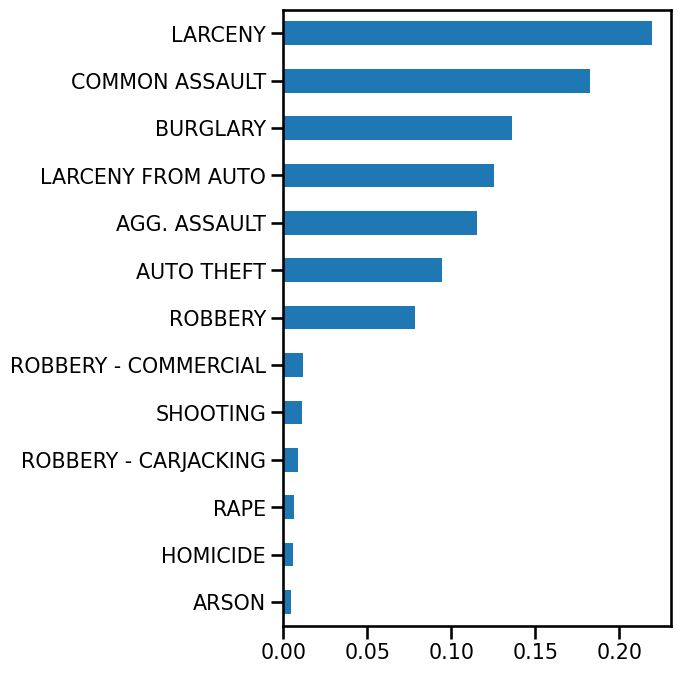

In [29]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Description'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8));

In [33]:
# convert df['Description'] series to df with new name 'Total # of Crimes'
crime_counts = df['Description'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
LARCENY,129058
COMMON ASSAULT,107078
BURGLARY,79959
LARCENY FROM AUTO,73543
AGG. ASSAULT,67884
AUTO THEFT,55412
ROBBERY,45972
ROBBERY - COMMERCIAL,6922
SHOOTING,6569
ROBBERY - CARJACKING,5217


In [34]:
# display with an inline-barplot inside your df
crime_counts.style.bar('Total # of Crimes')

,Total # of Crimes
LARCENY,129058
COMMON ASSAULT,107078
BURGLARY,79959
LARCENY FROM AUTO,73543
AGG. ASSAULT,67884
AUTO THEFT,55412
ROBBERY,45972
ROBBERY - COMMERCIAL,6922
SHOOTING,6569
ROBBERY - CARJACKING,5217


In [35]:
# use size instead of count to get numbers of total incidents per crime
df.groupby("Description").size().head()

Description
AGG. ASSAULT       67884
ARSON               2579
AUTO THEFT         55412
BURGLARY           79959
COMMON ASSAULT    107078
dtype: int64

### Create Separate Columns for Each Crime

1) Get a list of all of the unique crime descriptions in the dataset
2) 
Create an empty dictionary where we will save our new time series crime columns.
3) 
Loop through the list of crimes and

:
I. Save a temporary DataFrame where we filter for all of the rows of that crime type
II. Resample the temporary DataFrame as Daily data (crime counts) and save the .size()
III. Save the temporary DataFrame in the dictionary, using the  rime description as the

4) key.
Finally, we will convert our dictionaries to a DataFrame.

In [36]:
# 1. create list of unique crime descriptions
crime_list = df['Description'].unique()

# view list
crime_list

array(['LARCENY', 'RAPE', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'BURGLARY',
       'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL',
       'ARSON', 'ROBBERY - CARJACKING', 'HOMICIDE', 'SHOOTING'],
      dtype=object)

In [37]:
# 2. create empty dictionary to save new time series crime columns
CRIMES = {}

In [38]:
# 3. loop through list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Description']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['LARCENY', 'RAPE', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'BURGLARY', 'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL', 'ARSON', 'ROBBERY - CARJACKING', 'HOMICIDE', 'SHOOTING'])

In [40]:
# 4. Convert Dict to df
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,LARCENY,RAPE,LARCENY FROM AUTO,AGG. ASSAULT,BURGLARY,COMMON ASSAULT,AUTO THEFT,ROBBERY,ROBBERY - COMMERCIAL,ARSON,ROBBERY - CARJACKING,HOMICIDE,SHOOTING
CrimeDateTime,,,,,,,,,,,,,
2011-01-01 00:00:00+00:00,39,5.0,27,28,21,41,15,5,2,1.0,NaN,NaN,NaN
2011-01-02 00:00:00+00:00,20,2.0,20,6,19,14,5,10,1,0.0,NaN,NaN,NaN
2011-01-03 00:00:00+00:00,19,1.0,16,13,21,15,7,9,1,0.0,NaN,NaN,NaN
2011-01-04 00:00:00+00:00,29,1.0,12,11,12,29,10,4,0,0.0,NaN,NaN,NaN
2011-01-05 00:00:00+00:00,30,0.0,14,9,28,26,10,6,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 00:00:00+00:00,25,NaN,13,8,9,22,41,10,0,0.0,3.0,3.0,2.0
2023-10-18 00:00:00+00:00,12,NaN,5,13,14,16,30,7,3,0.0,0.0,NaN,2.0
2023-10-19 00:00:00+00:00,28,NaN,11,14,7,19,31,10,4,1.0,2.0,NaN,4.0


In [42]:
# save new df
crimes_df.to_csv("baltimore_crime_counts_2023.csv")

## Timezones
Change or remove time zones from time series data

In [44]:
# import new time series df from last lesson
df = pd.read_csv("baltimore_crime_counts_2023.csv", parse_dates = ['CrimeDateTime'], index_col=0)

# check index
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-02 00:00:00+00:00',
               '2011-01-03 00:00:00+00:00', '2011-01-04 00:00:00+00:00',
               '2011-01-05 00:00:00+00:00', '2011-01-06 00:00:00+00:00',
               '2011-01-07 00:00:00+00:00', '2011-01-08 00:00:00+00:00',
               '2011-01-09 00:00:00+00:00', '2011-01-10 00:00:00+00:00',
               ...
               '2023-10-12 00:00:00+00:00', '2023-10-13 00:00:00+00:00',
               '2023-10-14 00:00:00+00:00', '2023-10-15 00:00:00+00:00',
               '2023-10-16 00:00:00+00:00', '2023-10-17 00:00:00+00:00',
               '2023-10-18 00:00:00+00:00', '2023-10-19 00:00:00+00:00',
               '2023-10-20 00:00:00+00:00', '2023-10-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=4677, freq=None)

In [48]:
# remove time zone by making index time zone naive
df = df.tz_convert(None)

# verify change
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21'],
              dtype='datetime64[ns]', name='CrimeDateTime', length=4677, freq=None)

## Binning Time Series

Aggregate/bin time series data based on time of day, day of the week, etc.


In [49]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [50]:
# view original data 
df = pd.read_csv("Part_1_Crime_Data.csv",
                 low_memory=False)
## Converting crimedatetime and coercing errors
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')
df = df.dropna(subset=['CrimeDateTime'])
## setting and sorting the index
df = df.set_index("CrimeDateTime")
df = df.sort_index()
df.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:00+00:00,-76.566719,39.291959,529614,22F05949,3AO,ROBBERY,Inside,PERSONAL_WEAPONS,223,M,20.0,WHITE,HISPANIC_OR_LATINO,3700 LEVERTON AVE,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,"(39.291958801114234,-76.566719001516489)",STREET,1
1922-06-22 13:00:00+00:00,-76.612378,39.276740,529613,22F07001,4E,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,942,M,58.0,WHITE,NaN,1100 LIGHT ST,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",STREET,1
1963-10-30 00:00:00+00:00,-76.702653,39.326879,529612,17K02992,2A,RAPE,I,OTHER,622,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3100 FERNDALE AVE,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,"(39.326879,-76.702653)",ROW/TOWNHOUSE-OCC,1


In [51]:
# make time zone naive
## baltimore is in eastern time zone,but can just use tz-naive index by choosing None
df = df.tz_convert(None)
df.head(3)

,X,Y,RowID,CCNumber,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents
CrimeDateTime,,,,,,,,,,,,,,,,,,,,,,
1920-06-18 01:30:00,-76.566719,39.291959,529614,22F05949,3AO,ROBBERY,Inside,PERSONAL_WEAPONS,223,M,20.0,WHITE,HISPANIC_OR_LATINO,3700 LEVERTON AVE,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,"(39.291958801114234,-76.566719001516489)",STREET,1
1922-06-22 13:00:00,-76.612378,39.276740,529613,22F07001,4E,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,942,M,58.0,WHITE,NaN,1100 LIGHT ST,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,"(39.276739999999997,-76.612378000000007)",STREET,1
1963-10-30 00:00:00,-76.702653,39.326879,529612,17K02992,2A,RAPE,I,OTHER,622,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,3100 FERNDALE AVE,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,"(39.326879,-76.702653)",ROW/TOWNHOUSE-OCC,1


In [55]:
## Drop extra columns not needed
drop_cols = ['X','Y','RowID','CCNumber','Post','GeoLocation', 'Location','PremiseType']
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587670 entries, 1920-06-18 01:30:00 to 2023-10-21 23:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeCode        587670 non-null  object 
 1   Description      587670 non-null  object 
 2   Inside_Outside   536409 non-null  object 
 3   Weapon           145088 non-null  object 
 4   Gender           493047 non-null  object 
 5   Age              473010 non-null  float64
 6   Race             567985 non-null  object 
 7   Ethnicity        61609 non-null   object 
 8   Old_District     563485 non-null  object 
 9   New_District     16201 non-null   object 
 10  Neighborhood     579519 non-null  object 
 11  Latitude         586686 non-null  float64
 12  Longitude        586686 non-null  float64
 13  Total_Incidents  587670 non-null  int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 67.3+ MB


### Feature Engineering and Initial EDA

In [56]:
# save individual pieces of datetime column as separate features for EDA

# save date as column
df['Date'] = df.index.date

# could also use .strftime + pd.to_datetime
# df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,Total_Incidents,Date
CrimeDateTime,,,,,,,,,,,,,,,
1920-06-18 01:30:00,3AO,ROBBERY,Inside,PERSONAL_WEAPONS,M,20.0,WHITE,HISPANIC_OR_LATINO,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,1,1920-06-18
1922-06-22 13:00:00,4E,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,M,58.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,1,1922-06-22
1963-10-30 00:00:00,2A,RAPE,I,OTHER,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,1,1963-10-30


In [59]:
# save year as column
df['Year'] = df.index.year
df.head()

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,Total_Incidents,Date,Year
CrimeDateTime,,,,,,,,,,,,,,,,
1920-06-18 01:30:00,3AO,ROBBERY,Inside,PERSONAL_WEAPONS,M,20.0,WHITE,HISPANIC_OR_LATINO,SOUTHEAST,NaN,BALTIMORE HIGHLANDS,39.291959,-76.566719,1,1920-06-18,1920
1922-06-22 13:00:00,4E,COMMON ASSAULT,Inside,PERSONAL_WEAPONS,M,58.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.276740,-76.612378,1,1922-06-22,1922
1963-10-30 00:00:00,2A,RAPE,I,OTHER,F,32.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHWEST,NaN,HOWARD PARK,39.326879,-76.702653,1,1963-10-30,1963
1966-01-01 01:00:00,2A,RAPE,I,OTHER,F,62.0,WHITE,NaN,SOUTHWEST,NaN,WEST HILLS,39.295985,-76.709443,1,1966-01-01,1966
1969-07-20 21:00:00,2A,RAPE,NaN,OTHER,NaN,NaN,UNKNOWN,NaN,NORTHERN,NaN,ROLAND PARK,39.358900,-76.635319,1,1969-07-20,1969


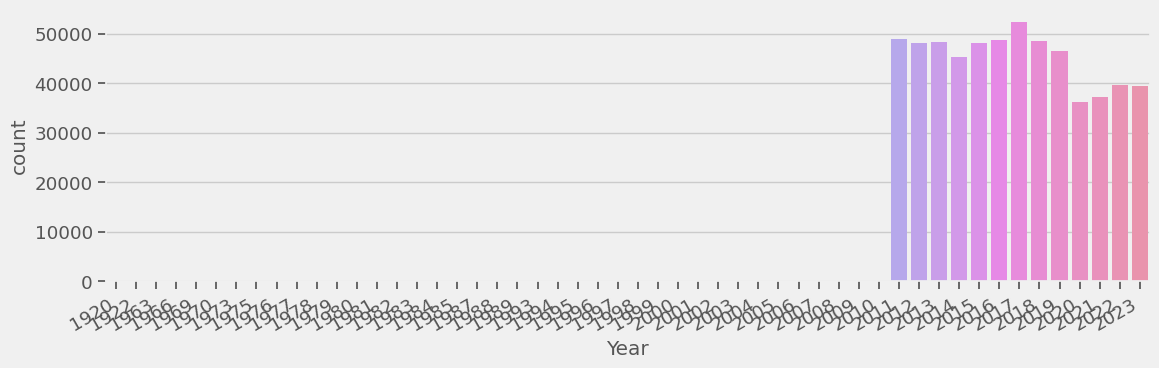

In [60]:
## Visualize years
ax = sns.countplot(data=df, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [61]:
## keeping data from yr 2011 to present
df = df.loc['2011':].copy()

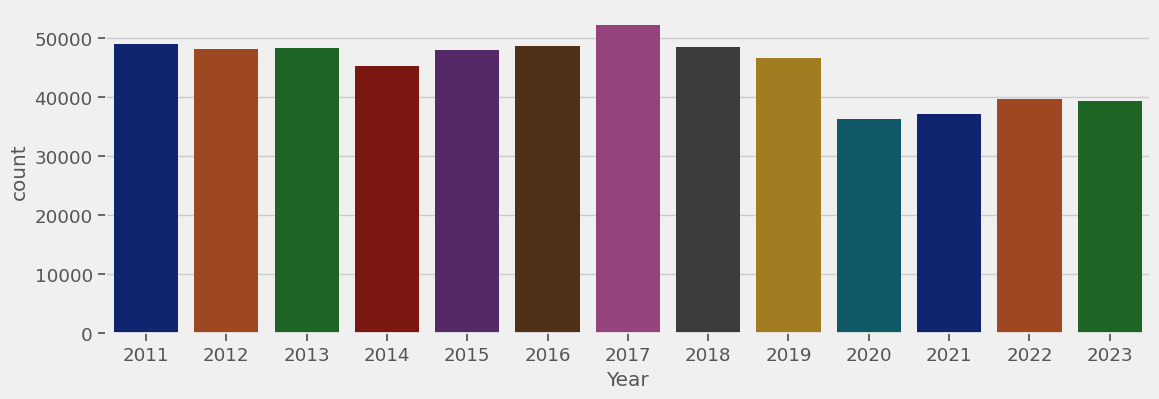

In [62]:
## visualizing again with years removed
sns.countplot(data=df, x='Year',palette='dark');

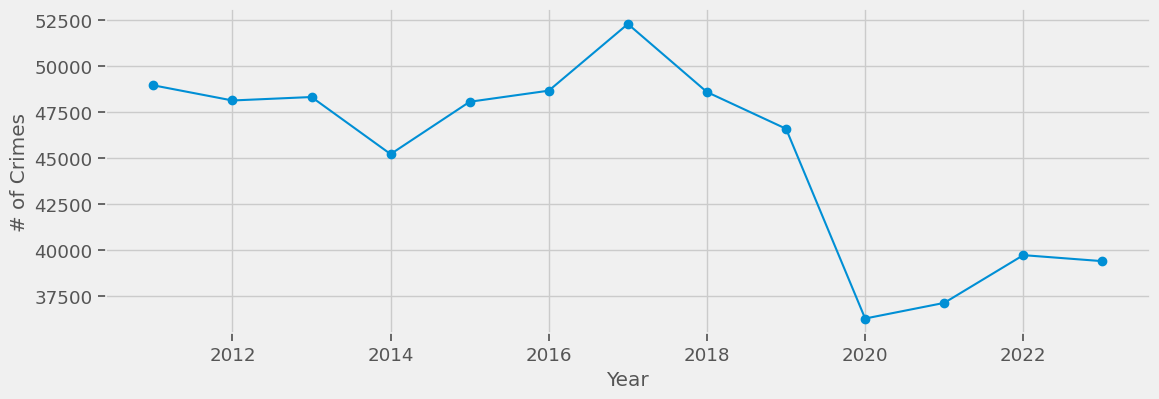

In [63]:
## save year counts and plot
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [64]:
# see which months have higher or lower crime, same as we did with year
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head()

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,Total_Incidents,Date,Year,Month,MonthName
CrimeDateTime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,6E,LARCENY,O,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,MOSHER,39.295633,-76.661518,1,2011-01-01,2011,1,January
2011-01-01 00:00:00,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,HARLEM PARK,39.298964,-76.639291,1,2011-01-01,2011,1,January
2011-01-01 00:00:00,6G,LARCENY,I,NaN,F,26.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.276987,-76.613380,1,2011-01-01,2011,1,January
2011-01-01 00:01:00,6J,LARCENY,I,NaN,M,24.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.274854,-76.612777,1,2011-01-01,2011,1,January
2011-01-01 00:01:00,6G,LARCENY,I,NaN,NaN,NaN,UNKNOWN,NaN,SOUTHEAST,NaN,GREEKTOWN,39.285083,-76.552772,1,2011-01-01,2011,1,January


In [65]:
# create dictionary to match number of month with name of month
# saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

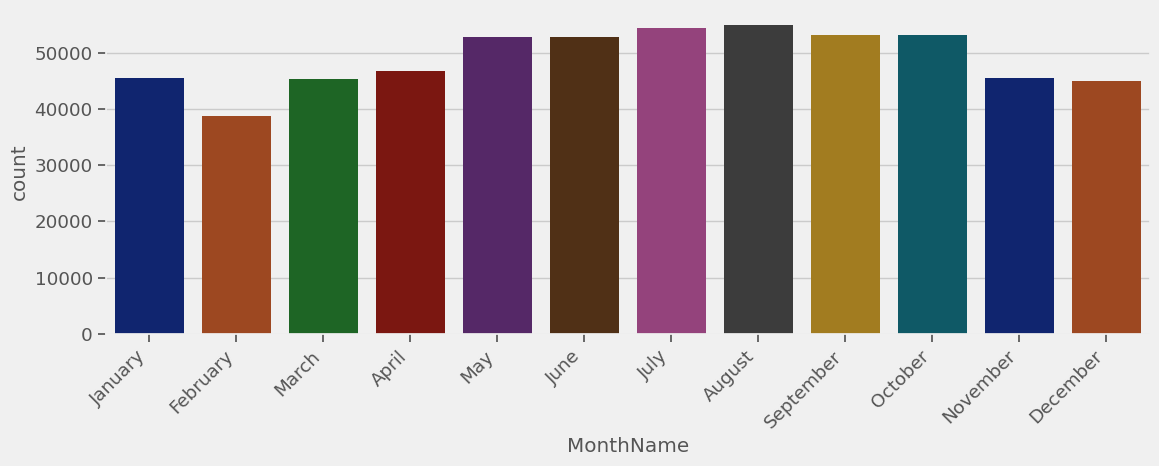

In [66]:
# make countploy by month
ax = sns.countplot(data=df, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

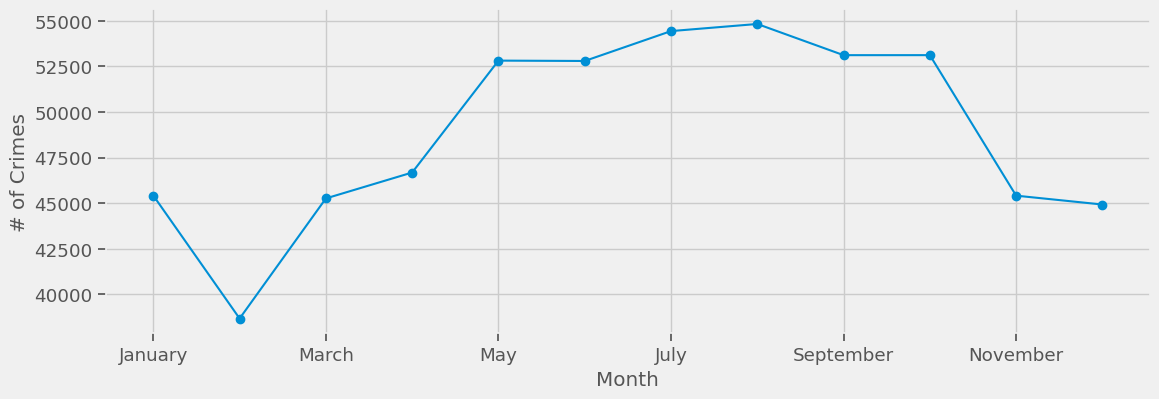

In [67]:
## save month counts and plot
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');



In [68]:
# do the same for day of week as we did month and year
## adding day of week as both number & name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

,CrimeCode,Description,Inside_Outside,Weapon,Gender,Age,Race,Ethnicity,Old_District,New_District,Neighborhood,Latitude,Longitude,Total_Incidents,Date,Year,Month,MonthName,DayOfWeek,DayNum
CrimeDateTime,,,,,,,,,,,,,,,,,,,,
2011-01-01,6E,LARCENY,O,NaN,M,44.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,MOSHER,39.295633,-76.661518,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,2A,RAPE,NaN,OTHER,M,16.0,BLACK_OR_AFRICAN_AMERICAN,NaN,WESTERN,NaN,HARLEM PARK,39.298964,-76.639291,1,2011-01-01,2011,1,January,Saturday,5
2011-01-01,6G,LARCENY,I,NaN,F,26.0,WHITE,NaN,SOUTHERN,NaN,FEDERAL HILL,39.276987,-76.613380,1,2011-01-01,2011,1,January,Saturday,5


In [69]:
# saving lookup for number vs named days
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup =dict(zip(unique_days['DayNum'],unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

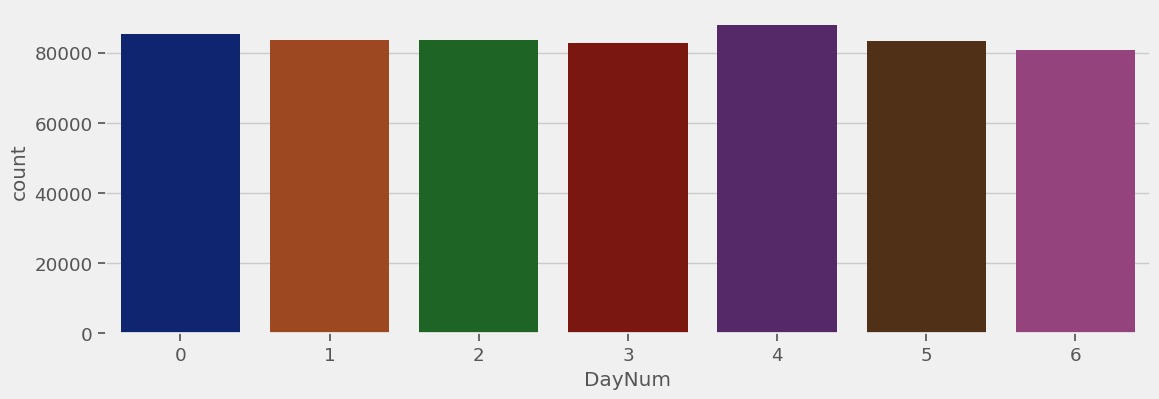

In [74]:
## plot DayNum, but use names from day_lookup for ticks
ax = sns.countplot(data=df, x='DayNum',palette='dark')

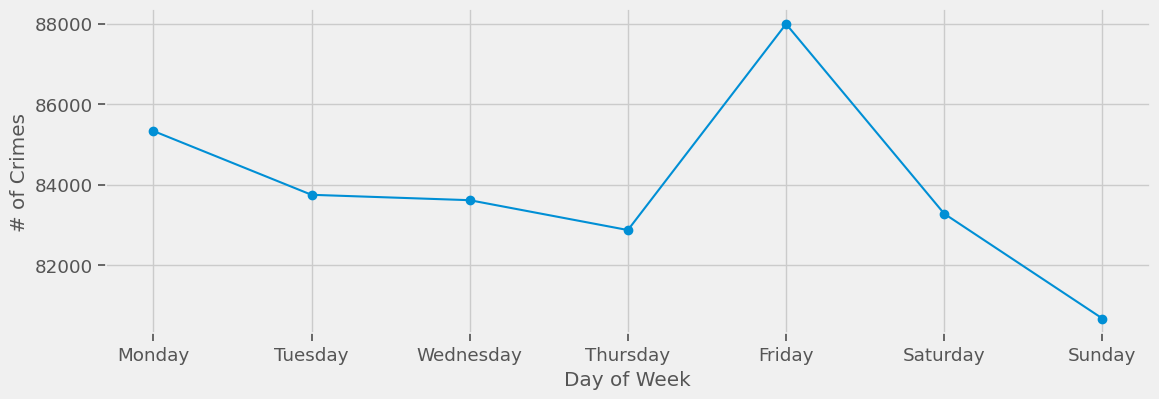

In [75]:
## save day counts and plot
day_counts = df['DayNum'].value_counts().sort_index()

## now that its in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Day of Week')


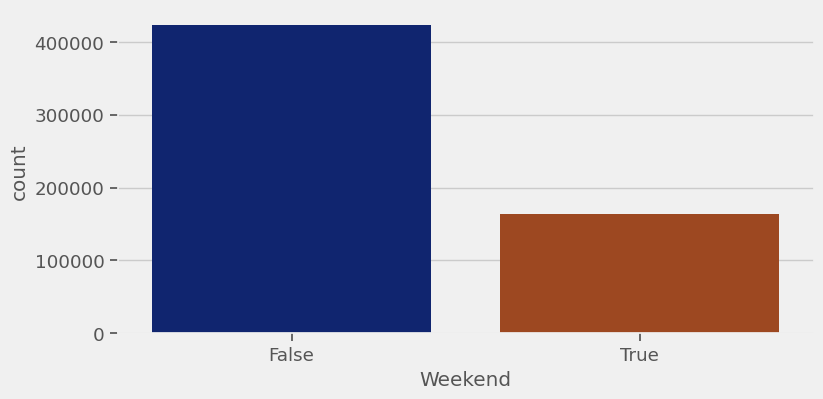

In [76]:
df['Weekend'] = df['DayOfWeek'].isin(['Saturday','Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend',palette='dark');

In [77]:
# normalize by calculating value counts and then dividing week days by 5 and weekend by 2
weekend_counts = df["Weekend"].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

False    84711
True     81975
Name: Weekend, dtype: int64

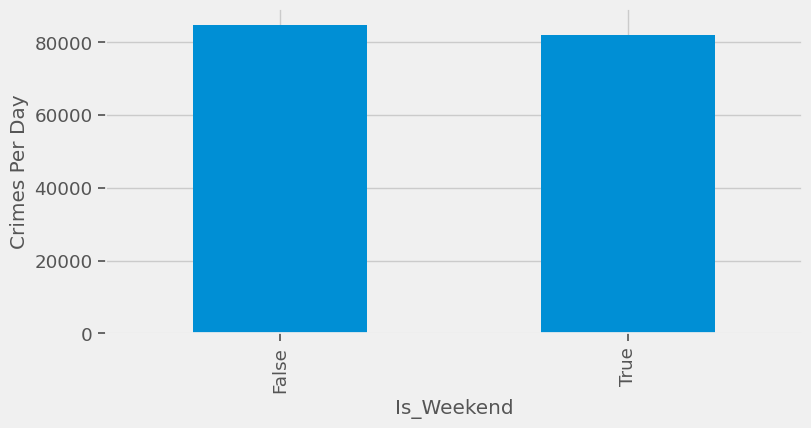

In [78]:
ax = weekend_counts.plot(kind='bar',figsize=(8,4))
ax.set(ylabel='Crimes Per Day', xlabel='Is_Weekend');

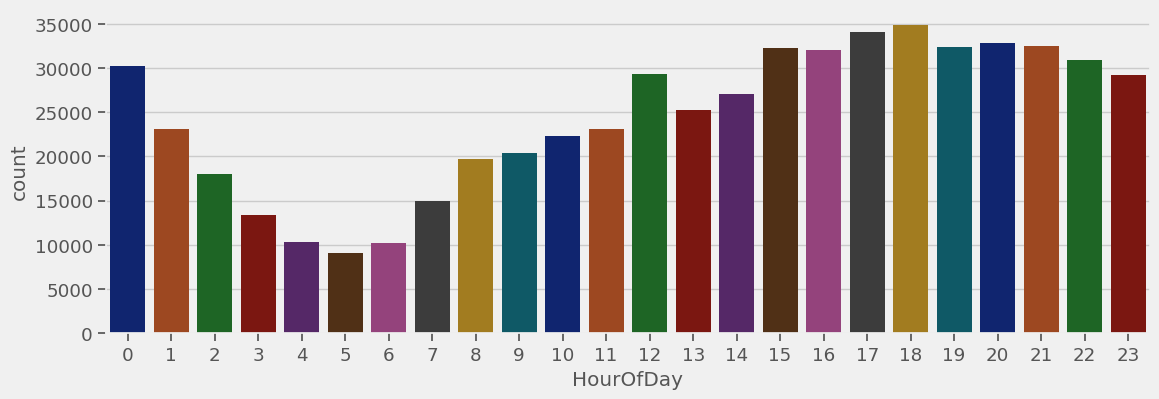

In [79]:
# adding hour of the day (12am=0) 
df['HourOfDay'] = df.index.hour 
sns.countplot(data=df, x='HourOfDay',palette='dark');

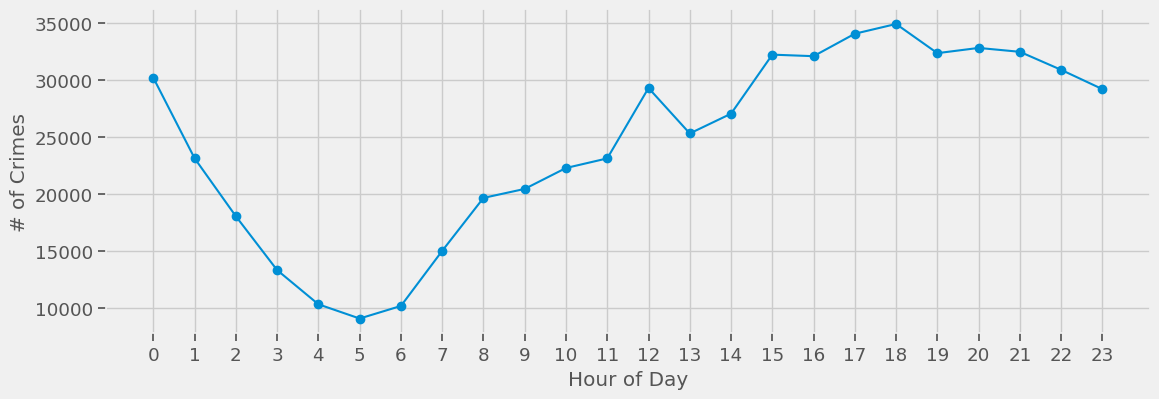

In [80]:
## save hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()
# year_counts = df.groupby("Year").size()
ax = hour_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);

## Seasonality

Identify seasonality in time series.

Apply Seasonal Decomposition to separate time series components.

Use visualizations to quantify the magnitude and duration of a season.

In [87]:
# visualize select crimes
crimes = ['LARCENY','LARCENY FROM AUTO', 'AUTO THEFT','SHOOTING','ROBBERY - CARJACKING']
crimes_ts = crimes_df[crimes].copy()
crimes_ts

,LARCENY,LARCENY FROM AUTO,AUTO THEFT,SHOOTING,ROBBERY - CARJACKING
CrimeDateTime,,,,,
2011-01-01 00:00:00+00:00,39,27,15,NaN,NaN
2011-01-02 00:00:00+00:00,20,20,5,NaN,NaN
2011-01-03 00:00:00+00:00,19,16,7,NaN,NaN
2011-01-04 00:00:00+00:00,29,12,10,NaN,NaN
2011-01-05 00:00:00+00:00,30,14,10,NaN,NaN
...,...,...,...,...,...
2023-10-17 00:00:00+00:00,25,13,41,2.0,3.0
2023-10-18 00:00:00+00:00,12,5,30,2.0,0.0
2023-10-19 00:00:00+00:00,28,11,31,4.0,2.0


In [88]:
# view null values
crimes_ts.isna().sum()

LARCENY                   0
LARCENY FROM AUTO         0
AUTO THEFT                0
SHOOTING                384
ROBBERY - CARJACKING      8
dtype: int64

In [89]:
# fill null values with 0s
crimes_ts = crimes_ts.fillna(0)

# verify change
crimes_ts.isna().sum()

LARCENY                 0
LARCENY FROM AUTO       0
AUTO THEFT              0
SHOOTING                0
ROBBERY - CARJACKING    0
dtype: int64

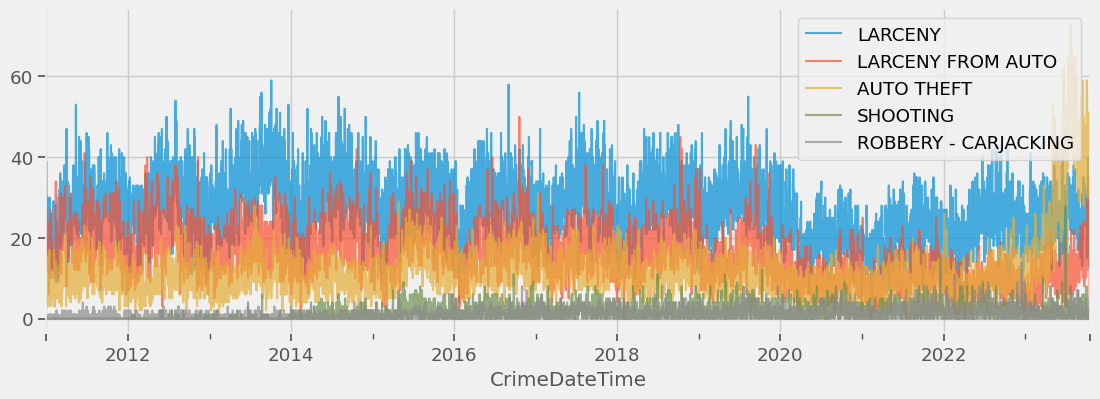

In [91]:
# plot crimes_ts
crimes_ts.plot(grid=True,alpha=0.7);

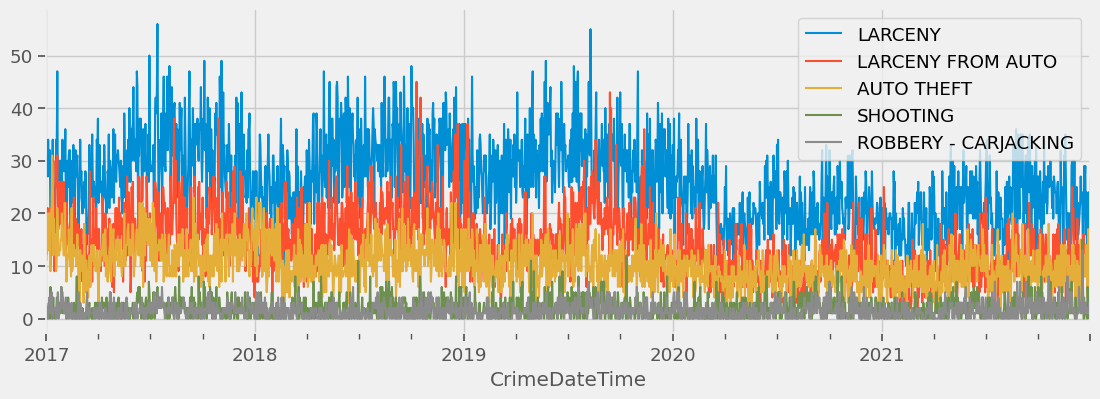

In [93]:
# zoom in on 2017-2021
plot_df = crimes_ts.loc['2017':'2021']
plot_df.plot(grid=True);

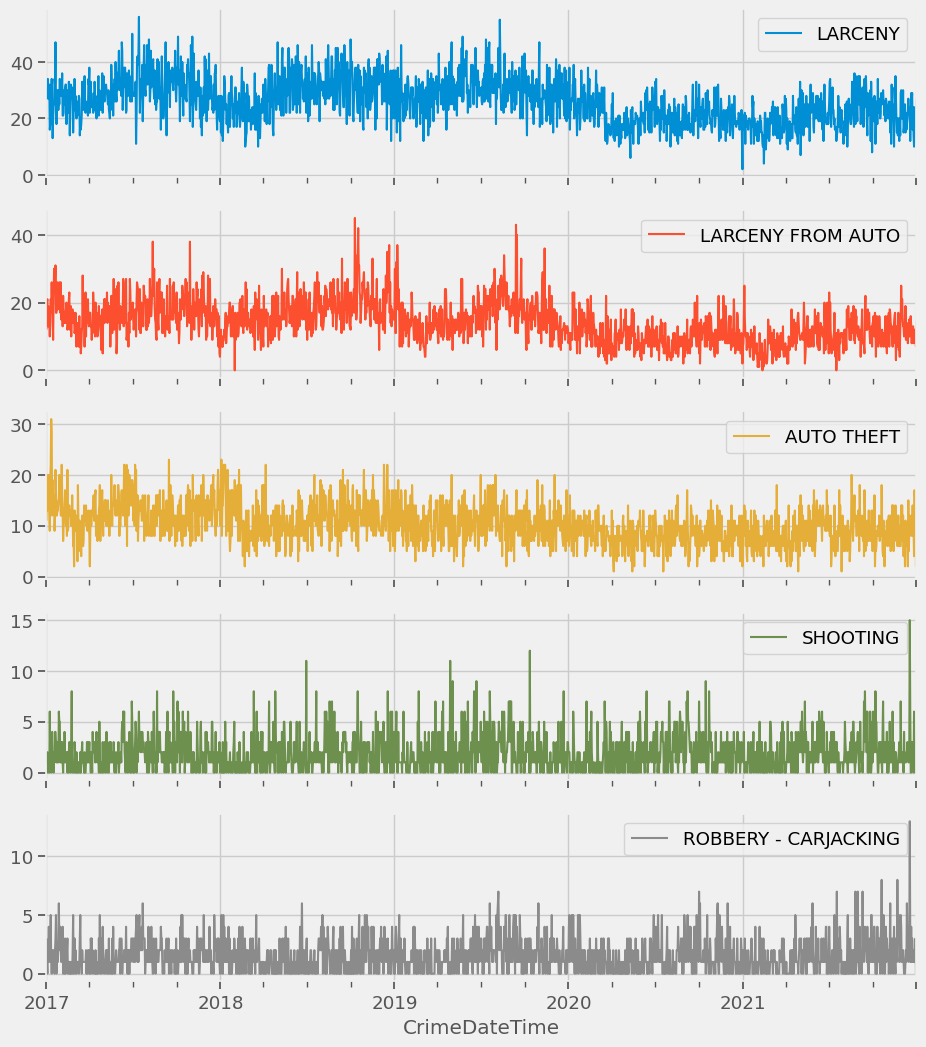

In [94]:
# plot each crime into its own plot with subplots = True
plot_df.plot(subplots=True,figsize=(10,12),grid=True);

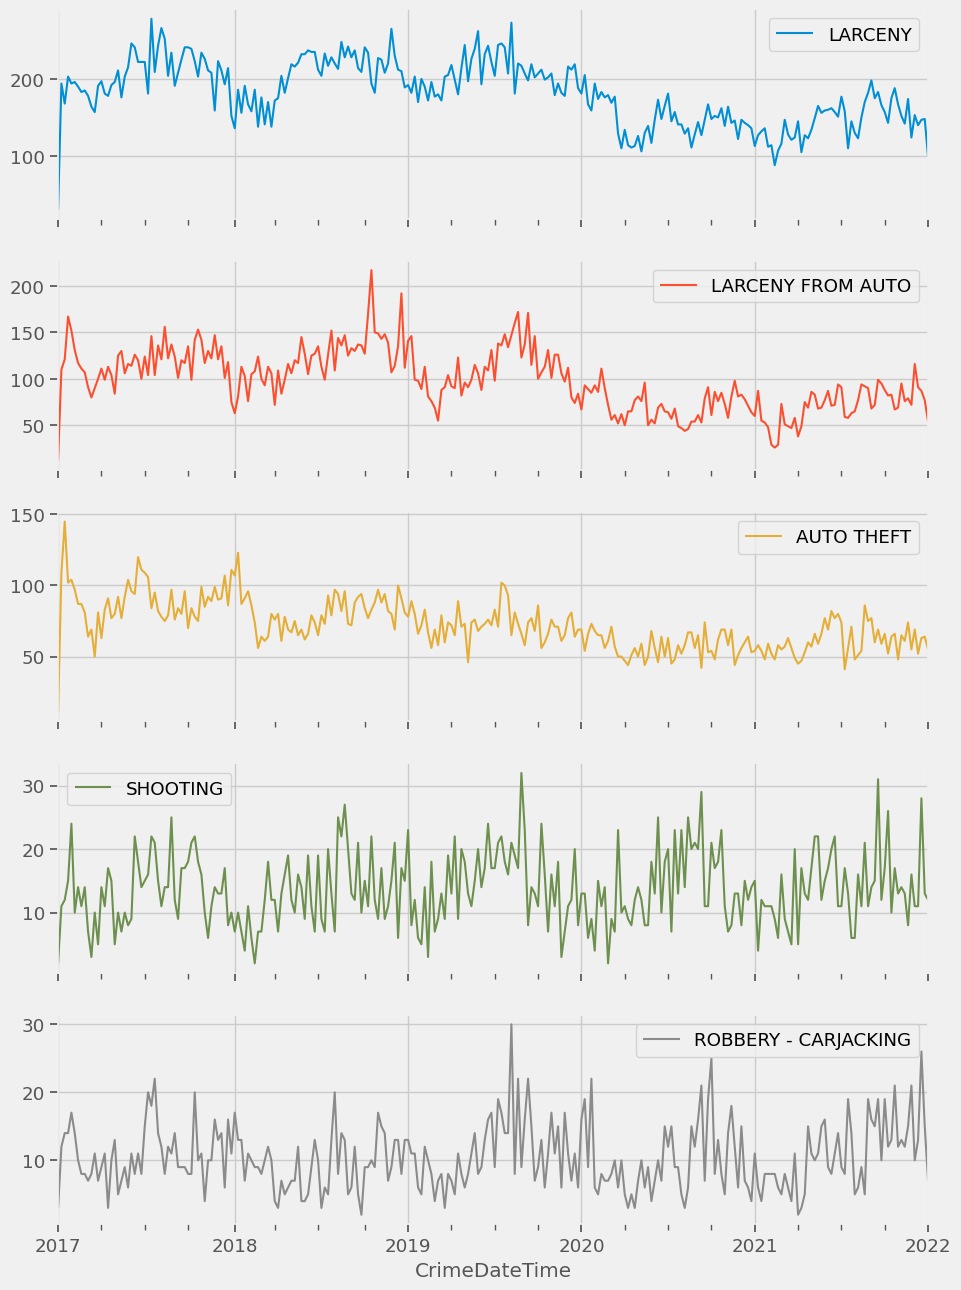

In [95]:
# resample to higher frequency (weekly) to better identify patterns
plot_df_W = crimes_ts.loc['2017':'2021'].resample('W').sum()
plot_df_W.plot(grid=True,subplots=True,figsize=(10,15));

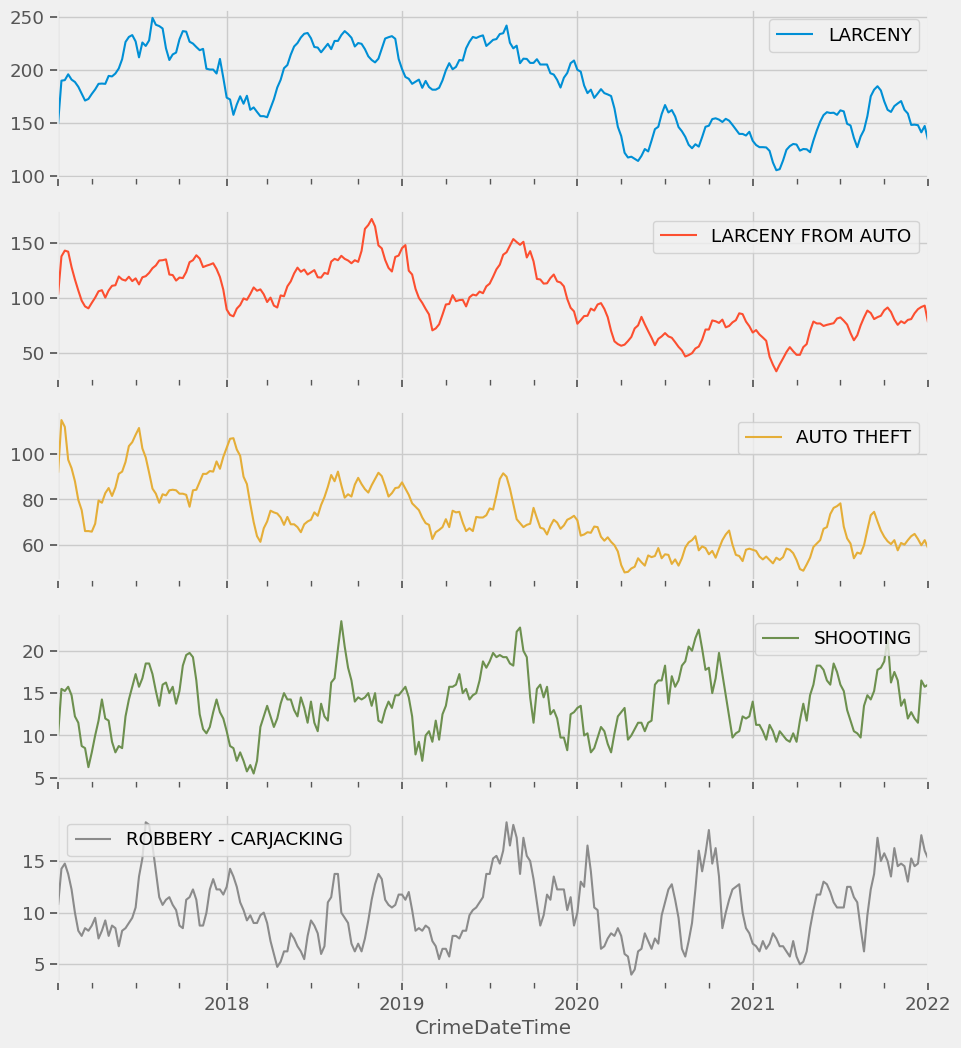

In [96]:
# use 4-week rolling mean to smooth the data
plot_df_W.rolling(4).mean().dropna().plot(subplots=True,figsize=(10,12));

In [97]:
# use seasonal_decompose to divide time series into 3 components
# trend, seasonal, and residuals

# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa
tsa

<module 'statsmodels.tsa.api' from 'C:\\Users\\eliud\\anaconda3\\envs\\dojo-env\\lib\\site-packages\\statsmodels\\tsa\\api.py'>

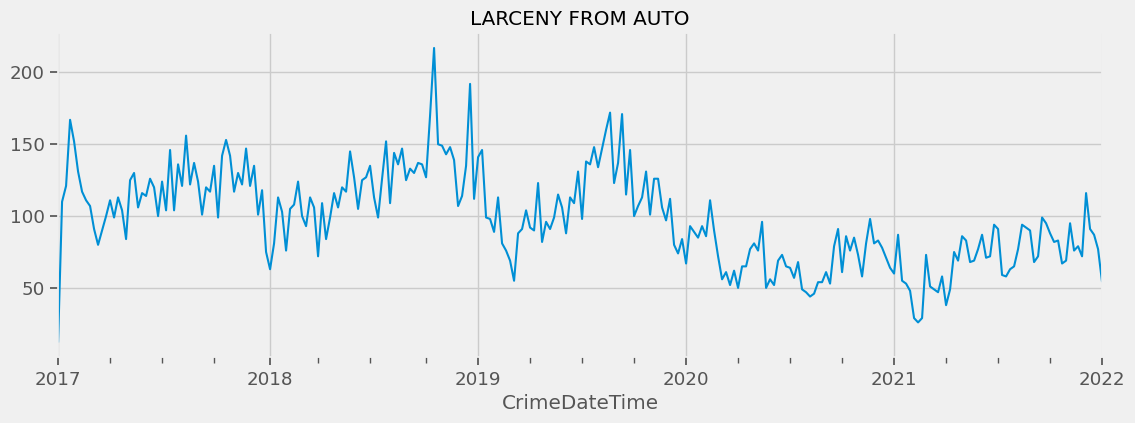

In [99]:
# apply decomp to LARCENY FROM AUTO
crime_type = "LARCENY FROM AUTO"
ts = plot_df_W[crime_type]
ts.plot(title=crime_type);

In [100]:
decomp = tsa.seasonal_decompose(ts)
decomp

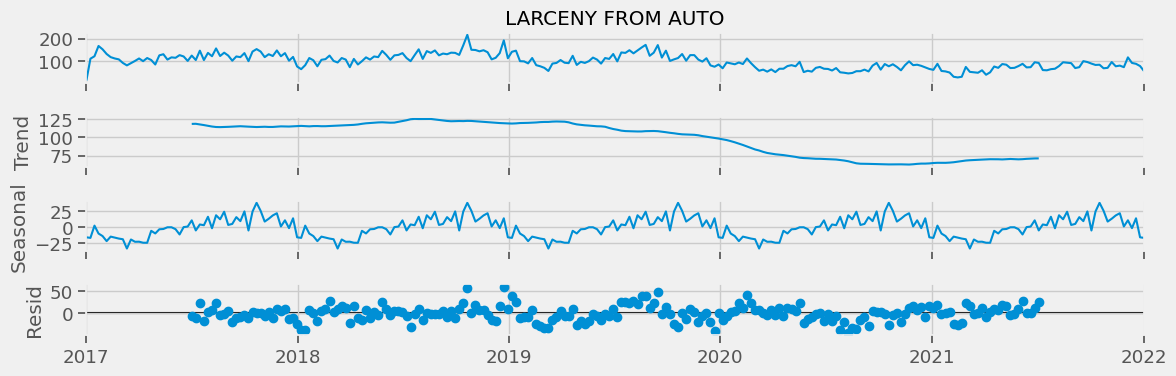

In [102]:
# visualize decomp results with plot()
fig = decomp.plot()

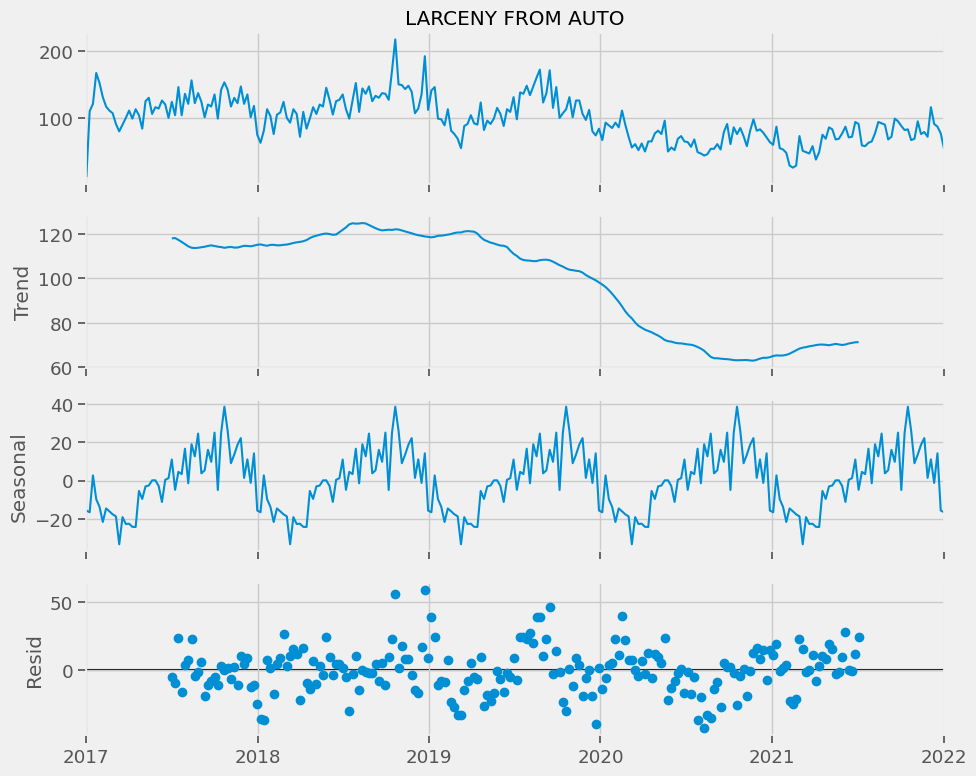

In [103]:
# adjust decomp fig size after its created
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()